---

# 스프린트미션10 3팀_김명환

- 미션 소개
  - 텍스트 데이터와 임베딩 토픽에서 배운 내용을 바탕으로 문제를 풀어 보세요.<br/>
  - 스프린트 미션 유형에 대한 소개와 제출 방식은 **스프린트 미션 안내 및 제출 가이드**를 참고 부탁드립니다.

- 사용 데이터셋
  - 이번 미션에서는 **18,846개의 뉴스 문서를 20개의 카테고리로 분류한 News Group 20 데이터**를 사용합니다.<br/>
  - 텍스트 데이터를 입력으로 받아 뉴스의 카테고리를 예측하는 딥 러닝 모델을 구현해 봅시다.

- 가이드라인
  1. 데이터 전처리
     - 텍스트 데이터에서 토큰화를 수행하세요.
     - 데이터를 훈련 세트와 테스트 세트로 적절히 분리하세요.
  2. 임베딩 적용
     - **Word2Vec**, **FastText**, **GloVe** 방식으로 입력 데이터를 벡터화하여 임베딩 행렬을 생성하세요.
  3. 데이터셋 및 로더 구현
     - PyTorch의 `Dataset`과 `DataLoader` 객체를 활용해 데이터를 처리할 수 있도록 구현하세요.
     - 벡터화된 데이터를 모델에 입력 가능한 형태로 변환하세요.
  4. 모델 구현
     - **LSTM**, **GRU** 등 RNN 기반의 딥 러닝 모델을 구현하세요.
     - 임베딩 레이어를 추가해 입력 데이터와 임베딩 벡터를 연결하세요.
     - 각 임베딩 방식(Word2Vec, FastText, GloVe)에 대해 모델을 학습할 수 있도록 설정하세요.
  5. 모델 학습 및 평가
     - 모델을 학습시키고, 테스트 데이터에서 정확도 등 주요 평가지표를 계산하세요.
     - Word2Vec, FastText, GloVe 임베딩 방식을 사용했을 때의 성능을 비교하고 결과를 분석하세요.
  6. 모델 성능 개선 (심화)
     - 데이터 전처리(특수 문자, 불용어 제거 등) 및 모델 구조 변경, 하이퍼파라미터 튜닝 등을 통해 모델의 성능을 높여 나가 보세요.

- 제출 안내

    다음 내용을 포함한 **Colab Notebook 파일**을 제출해 주세요.

- 제출 내용
  1. 모델 구현 및 학습 결과
    - 텍스트 분류 모델을 구현해 주세요.
    - 데이터 로드, 전처리, 임베딩 적용, 모델 구현 및 학습, 예측 및 평가 과정을 순차적으로 진행해 주세요.
  2. 마크다운을 활용한 설명
    - 각 코드 셀이 수행하는 작업(의도, 알고리즘, 함수 설명 등)을 마크다운을 통해 자세히 기록해 주세요.
    - 노트북 내에서 코드와 결과를 한눈에 이해할 수 있도록 정리해 주세요.
  3. 모델 성능 평가 및 제출
    - 평가 지표(Accuracy, Precision, Recall, F1-score 등)를 활용해 모델 성능을 분석하고 비교해 보세요.
    - 모델별 성능 평가 결과를 포함한 노트북 파일을 제출하세요.

- 참고 사항
    - 미션을 시작할 때 도움이 필요하다면, **Baseline 코드**를 참고할 수 있습니다. 이 코드는 기본적인 코드로 제공되며, 여러분이 원하는 대로 자유롭게 변형할 수 있어요.

- 주의 사항
  - Baseline 코드는 여러분이 모델을 시작하는 데 도움을 주기 위한 참고 자료일 뿐이며, Baseline 코드를 그대로 사용하는 것보다는 이를 기반으로 **자신의 아이디어를 추가하고 발전**시키는 것이 중요합니다.
  - 가능하면 스스로 모델을 구축해보고 다양한 방법을 시도하여 성능을 향상시켜 보세요.


---
---

## >미션< News Group 20 데이터셋 검토

- 데이터셋 개요
  - **fetch_20newsgroups**는 약 20,000개의 뉴스그룹 문서를 포함한 텍스트 분류 데이터셋입니다.

- 기본 정보
  - **총 문서 수**: 18,846개
  - **카테고리 수**: 20개
  - **작업 유형**: 다중 클래스 분류 (Multi-class Classification)
  - **출처**: 1990년대 초반 Usenet 뉴스그룹 게시물

- 데이터 구조

```python
news_data = fetch_20newsgroups(subset='all', remove=('headers', 'footers', 'quotes'))
```

- 주요 속성
  1. **`news_data.data`**: 텍스트 문서들의 리스트
     - 각 요소는 하나의 뉴스 기사 본문 (문자열)
     - 예: `news_data.data[0]`은 첫 번째 기사 내용

  2. **`news_data.target`**: 각 문서의 카테고리 레이블
     - 정수 형태 (0~19)
     - `news_data.data`와 1:1 대응

  3. **`news_data.target_names`**: 카테고리 이름 리스트
     - 20개의 카테고리 이름

- 20개 카테고리 목록

<hr style="border: 1px dashed #999;">

```python
# 카테고리는 다음과 같이 그룹화됩니다:

컴퓨터 관련:
- comp.graphics (컴퓨터 그래픽)
- comp.os.ms-windows.misc (MS Windows)
- comp.sys.ibm.pc.hardware (IBM PC 하드웨어)
- comp.sys.mac.hardware (Mac 하드웨어)
- comp.windows.x (X Window 시스템)

레크리에이션:
- rec.autos (자동차)
- rec.motorcycles (오토바이)
- rec.sport.baseball (야구)
- rec.sport.hockey (하키)

과학:
- sci.crypt (암호학)
- sci.electronics (전자공학)
- sci.med (의학)
- sci.space (우주)

정치/종교/기타:
- misc.forsale (판매)
- talk.politics.misc (정치 일반)
- talk.politics.guns (총기 정치)
- talk.politics.mideast (중동 정치)
- talk.religion.misc (종교 일반)
- alt.atheism (무신론)
- soc.religion.christian (기독교)
```
<img src="https://c0z0c.github.io/sprint_mission/스프린트미션_완료/image/10/251008/데이타부포도.png" width="800px"/>

# >미션< 전처리

| 단계 | 처리 내용 | 목적 | 효과 |
|:---:|:---|:---|:---|
| 1 | 이메일 헤더 제거 | From, Subject, Lines 등 메타데이터 제거 | 노이즈 감소 |
| 2 | 이메일 주소 제거 | 개인정보 패턴 제거 | 프라이버시 보호 |
| 3 | URL 제거 | http://, www. 패턴 제거 | 무관한 링크 제거 |
| 4 | HTML 태그 제거 | <tag> 형태 제거 | 웹 마크업 정제 |
| 5 | HTML 엔티티 디코딩 | &amp;gt; → > 변환 | 특수문자 정규화 |
| 6 | ASCII 정규화 | NFKD 유니코드 정규화 | 영문 텍스트 통일 |
| 7 | 제어문자 제거 | \\x00-\\x1F 제거 | 파싱 오류 방지 |
| 8 | 소문자 변환 | 대소문자 통일 | 어휘 크기 감소 |
| 9 | 반복 느낌표 정규화 | !!! → ! | 감정 표현 표준화 |
| 10 | 반복 물음표 정규화 | ??? → ? | 감정 표현 표준화 |
| 11 | 반복 마침표 정규화 | ... → . | 문장 구분 명확화 |
| 12 | 특수 따옴표/대시 정규화 | ' → ', — → - | ASCII 통일 |
| 13 | 공백 정규화 | 다중 공백 → 단일 공백 | 토큰화 개선 |
| 14 | 품질 검증 | 알파벳 비율 ≥ 50% 필터링 | 저품질 문서 제거 |


- 전처리 전 / 후

| 지표 | 전처리 전 | 전처리 후 | 개선율 |
|:---|---:|---:|:---:|
| 총 문서 수 | 18,846개 | 17,322개 | 저품질 8.1% 제거 |
| 평균 문서 길이 | ~150단어 | ~136단어 | 9.3% 감소 |
| 어휘 크기 | ~149,000개 | ~50,000개 | 66.4% 감소 |
| 특수문자 비율 | ~8% | ~2% | 75% 감소 |
| HTML 태그 포함 | ~5% | 0% | 완전 제거 |


## >미션< 임베딩 / 데이타셋 로더

- 임베딩 파이프라인

<img src="https://c0z0c.github.io/sprint_mission/스프린트미션_완료/image/10/251008/10_임베딩_파이프라인.png" width="400px"/>

- 임베딩 적용 (Word2Vec, FastText, GloVe)

    - **3가지 임베딩 기법**을 **2가지 방식**으로 적용하여 총 **6개의 임베딩 조합**

| 임베딩 타입 | 학습 방식 | 차원 | 데이터 소스 |
|:---:|:---:|:---:|:---|
| **Word2Vec** | 직접 학습 | 100 | 뉴스그룹 훈련 데이터 |
| **Word2Vec** | API 다운로드 | 300 | Google News 사전학습 모델 |
| **FastText** | 직접 학습 | 100 | 뉴스그룹 훈련 데이터 |
| **FastText** | API 다운로드 | 300 | Wiki News 사전학습 모델 |
| **GloVe** | API 다운로드 | 100 | Wikipedia+Gigaword 모델 |
| **GloVe** | API 다운로드 | 300 | Wikipedia+Gigaword 모델 |

```
총 고유 단어: 148,942개
최종 어휘 크기: 50,000개 (min_freq=2)
특수 토큰: <PAD>(0), <UNK>(1)
```

- 직접 학습 방식 (100차원)
    - **목적**: 도메인 특화 학습 (뉴스 텍스트 최적화)
    - **학습 파라미터**:
        - 문맥 창(window): 10
        - 최소 빈도(min_count): 3
        - 에포크(epochs): 15
        - Skip-gram 방식 사용

- API 다운로드 방식 (300차원)
    - **목적**: 대규모 사전학습 지식 활용
    - **Gensim 캐시 관리**: 자동 다운로드 및 재사용
    - **어휘 매핑 커버리지**: 평균 70-90%

```
훈련 세트: 13,857개 → 217 배치 (batch_size=64)
검증 세트:  1,732개 →  28 배치
테스트 세트: 1,733개 →  28 배치

설정:
- shuffle=True (훈련만)
- num_workers=0
- pin_memory=True (GPU 가속)
```


## >미션< 모델

- 모델 아키텍쳐

<img src="https://c0z0c.github.io/sprint_mission/스프린트미션_완료/image/10/251008/10_RNN_모델구조_아키텍처.png" width="400px"/>

- 하이퍼파라미터

| 구성 요소 | 설정 값 | 설명 |
|:---|:---:|:---|
| **RNN 타입** | LSTM / GRU | 순차 데이터 처리 |
| **레이어 수** | 2 | 깊이 있는 특징 추출 |
| **은닉층 차원** | 128 | 양방향 → 출력 256차원 |
| **드롭아웃** | 0.3 | 과적합 방지 |
| **양방향** | True | 문맥 정보 양방향 활용 |

## 학습 및 평가

- 학습 설정

   ```
   최대 어휘 크기(max_vocab_size): 50,000
   최소 빈도(min_freq): 2
   은닉층 차원(hidden_dim): 128
   층 개수(num_layers): 2
   드롭아웃(dropout): 0.3
   배치 크기(batch_size): 64
   에포크(epochs): 10
   학습률(learning_rate): 0.001
   스케줄러: ReduceLROnPlateau (mode=max, factor=0.5, patience=3)
   ```

- 평가 결과 (기준선 - 어휘 50,000개)

   **상위 4개 모델 성능**

| 순위 | 모델 | 임베딩 | 차원 | Test Accuracy | F1 (W) | F1 (M) | Best Epoch |
|:---:|:---:|:---|:---:|:---:|:---:|:---:|:---:|
| **1** | **GRU** | **word2vec** | **100** | **0.6947** | **0.6943** | **0.6806** | 8 |
| 2 | GRU | word2vec | 300 | 0.6861 | 0.6890 | 0.6792 | 10 |
| 3 | GRU | glove | 300 | 0.6844 | 0.6841 | 0.6736 | 4 |
| 4 | GRU | fasttext | 100 | 0.6682 | 0.6683 | 0.6581 | 10 |

   **전체 12개 모델 성능 순위**

| 순위 | 모델 | 임베딩 | 차원 | Accuracy | F1 (W) | F1 (M) | Best Epoch |
|:---:|:---:|:---|:---:|:---:|:---:|:---:|:---:|
| 1 | GRU | word2vec | 100 | 0.6947 | 0.6943 | 0.6806 | 8 |
| 2 | GRU | word2vec | 300 | 0.6861 | 0.6890 | 0.6792 | 10 |
| 3 | GRU | glove | 300 | 0.6844 | 0.6841 | 0.6736 | 4 |
| 4 | GRU | fasttext | 100 | 0.6682 | 0.6683 | 0.6581 | 10 |
| 5 | GRU | glove | 100 | 0.6474 | 0.6493 | 0.6359 | 4 |
| 6 | GRU | fasttext | 300 | 0.6457 | 0.6491 | 0.6394 | 8 |
| 7 | LSTM | glove | 300 | 0.6244 | 0.6282 | 0.6174 | 8 |
| 8 | LSTM | word2vec | 100 | 0.6220 | 0.6184 | 0.6045 | 9 |
| 9 | LSTM | fasttext | 100 | 0.5972 | 0.5978 | 0.5857 | 10 |
| 10 | LSTM | glove | 100 | 0.5949 | 0.5978 | 0.5879 | 10 |
| 11 | LSTM | fasttext | 300 | 0.5505 | 0.5582 | 0.5488 | 8 |
| 12 | LSTM | word2vec | 300 | 0.4726 | 0.4801 | 0.4713 | 10 |

   **주요 발견**:
   - **최고 성능**: GRU + Word2Vec (100차원) - Accuracy 69.47%
   - GRU가 LSTM보다 전반적으로 우수한 성능
   - Word2Vec (100차원)이 가장 효과적
   - 300차원 임베딩이 항상 우수하지는 않음 (과적합 가능성)

## >미션< 결과

    **일반적 예상**
    - 300차원이 100차원보다 풍부한 의미 표현 가능
    - 사전학습 모델의 광범위한 지식 활용

    **실제 결과**
    - 100차원 직접 학습이 6개 중 4개 조합에서 우세
    - 특히 Word2Vec에서 **8.07%p** (LSTM) 차이

    **원인**
    1. **데이터 부족**: ~14k 샘플로 300차원 학습 부족
    2. **과적합**: 고차원 공간에서 희소성(sparsity) 증가
    3. **도메인 갭**: 사전학습 도메인과 뉴스 도메인 간 불일치


---

## >미션< 모델 성능 개선

- 성능 개선 결과 비교

   - 이전 성능 (셀 9 - 어휘 50,000개)

| 모델 | 임베딩 | 차원 | Test Accuracy | F1 (W) | F1 (M) | Best Epoch |
|:---:|:---|:---:|:---:|:---:|:---:|:---:|
| **GRU** | **word2vec** | **100** | **0.6947** | **0.6943** | **0.6806** | 8 |
| LSTM | word2vec | 100 | 0.6220 | 0.6184 | 0.6045 | 9 |

-  개선 후 성능 (어휘 20,000개 + 전처리 강화)

| 모델 | 임베딩 | 차원 | Test Accuracy | F1 (W) | F1 (M) | Best Epoch |
|:---:|:---|:---:|:---:|:---:|:---:|:---:|
| **GRU** | **word2vec** | **100** | **0.7191** | **0.7166** | **0.7036** | 4 |
| LSTM | word2vec | 100 | 0.6834 | 0.6817 | 0.6681 | 6 |

<img src="https://c0z0c.github.io/sprint_mission/스프린트미션_완료/image/10/251008/val_acc.png" width="640px"/>

- 성능 향상률

   - GRU + Word2Vec (100차원)
   ```
      Test Accuracy: 0.6947 → 0.7191 (+2.44%p, +3.51% 상승)
      F1-Score (W): 0.6943 → 0.7166 (+2.23%p, +3.21% 상승)
      F1-Score (M): 0.6806 → 0.7036 (+2.30%p, +3.38% 상승)
      Best Epoch:   8 → 4 (수렴 속도 개선, 2배 빠름)
   ```
   - LSTM + Word2Vec (100차원)
   ```
      Test Accuracy: 0.6220 → 0.6834 (+6.14%p, +9.87% 상승)
      F1-Score (W): 0.6184 → 0.6817 (+6.33%p, +10.24% 상승)
      F1-Score (M): 0.6045 → 0.6681 (+6.36%p, +10.52% 상승)
      Best Epoch:   9 → 6 (수렴 속도 개선)
   ```

- 결론

   - 개선 전략

      1. **어휘 크기 최적화**: 50,000 → 20,000개 (데이터 규모에 맞춤)
      2. **전처리 강화**: 불용어 제거 + 표제어 추출로 의미 집중
      3. **학습 파라미터 튜닝**: window=10, min_count=5, epochs=20

   - 최종 성과

      ** GRU + Word2Vec (100차원)**
      - Test Accuracy: 71.91%
      - F1-Score (Weighted): 71.66%
      - F1-Score (Macro): 70.36%
      - **→ 약 2.4%p 향상 (상대적으로 3.5% 개선)**
      - **수렴 속도: 8→4 epoch (2배 빠름)**

      ** LSTM + Word2Vec (100차원)**
      - Test Accuracy: 68.34%
      - F1-Score (Weighted): 68.17%
      - F1-Score (Macro): 66.81%
      - **→ 약 6.1%p 향상 (상대적으로 9.9% 개선)**
      - **수렴 속도: 9→6 epoch (1.5배 빠름)**

- 성능 개선 요약

| 항목 | GRU | LSTM |
|:---|:---:|:---:|
| **정확도 향상** | +2.44%p | +6.14%p |
| **F1 (Weighted) 향상** | +2.23%p | +6.33%p |
| **F1 (Macro) 향상** | +2.30%p | +6.36%p |
| **상대적 개선율** | 3.51% | 9.87% |
| **수렴 속도** | 대폭 개선 (8→4) | 개선 (9→6) |

   **결과 해석:**
   - 두 모델 모두 유의미한 성능 향상
   - LSTM의 개선폭이 GRU의 약 2.8배
   - GRU는 수렴 속도가 2배 빠름 (4 epoch)
   - 전처리 + 어휘 최적화의 시너지 효과 입증
   - 과적합 방지 및 학습 효율성 향상

---
---

# >프로그램< 기본 라이브러리 로드

In [ ]:
try:
    import gensim
    print(f"gensim 설치됨: 버전 {gensim.__version__} — 설치 생략")
except Exception:
    print("gensim 미설치 감지 — 설치 시작...")
    !pip install -q gensim
    print("설치 완료: gensim")
    # Colab 또는 Jupyter 커널 자동 재시작 시도
    try:
        # Colab 환경이면 런타임 재시작
        from google.colab import runtime
        print("Colab 환경 감지 — 런타임 재시작합니다...")
        runtime.restart_runtime()
    except Exception:
        try:
            # Jupyter (IPython) 커널 재시작
            from IPython import get_ipython
            print("Jupyter 환경 감지 — 커널 재시작합니다...")
            get_ipython().kernel.do_shutdown(restart=True)
        except Exception:
            print("자동 재시작 불가 — 수동으로 Jupyter/Colab 세션을 재시작하세요.")


gensim 설치됨: 버전 4.3.3 — 설치 생략


In [ ]:
# helper_utils.py 다운로드 및 로드
from urllib.request import urlretrieve; urlretrieve("https://raw.githubusercontent.com/c0z0c/jupyter_hangul/refs/heads/beta/helper_utils.py", "helper_utils.py")
import importlib
import helper_utils as hu
importlib.reload(hu)
from helper_utils import *

설정 완료: 한글 폰트, plt 전역 등록, pandas 확장, 캐시 기능
🌐 https://c0z0c.github.io/jupyter_hangul
install fonts-nanum...
Mounted at /content/drive
✅ 설정 완료: 한글 폰트, plt 전역 등록, pandas 확장, 캐시 기능
pd commit 저장 경로 = /content/drive/MyDrive
🌐 https://c0z0c.github.io/jupyter_hangul
Mounted at /content/drive
✅ 설정 완료: 한글 폰트, plt 전역 등록, pandas 확장, 캐시 기능
pd commit 저장 경로 = /content/drive/MyDrive
🌐 https://c0z0c.github.io/jupyter_hangul
Mounted at /content/drive
✅ 설정 완료: 한글 폰트, plt 전역 등록, pandas 확장, 캐시 기능
pd commit 저장 경로 = /content/drive/MyDrive


In [ ]:
# 기본 라이브러리

# --- Scikit-learn: 데이터 전처리, 모델, 평가 ---
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.datasets import (
    fetch_california_housing, load_iris, make_moons, make_circles,
    load_breast_cancer, load_wine
)
from sklearn import datasets
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.metrics import average_precision_score

# --- 기타 라이브러리 ---
from PIL import Image
from PIL import ImageFilter
from PIL import ImageDraw
import albumentations as A
import IPython.display
#from tqdm import tqdm
from tqdm.notebook import tqdm

# --- PyTorch: 딥러닝 관련 ---
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import torchvision
from torch.utils.data import Dataset, DataLoader
from torchvision.transforms import v2
from torchvision.datasets import CocoDetection
from torchvision.transforms import functional as TF
from torch.nn import CrossEntropyLoss
from collections import OrderedDict
from collections import Counter

# --- 기타 ---
import pickle
import html
import unicodedata
import json
import re
import os
import sys
import json
import math
import random
import yaml
import shutil
import pandas as pd
import numpy as np
import seaborn as sns
import xml.etree.ElementTree as ET
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import pandas as pd
from datetime import datetime
from datetime import timezone, timedelta
import pytz
__kst = pytz.timezone('Asia/Seoul')

# GPU 설정
__device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
__device_cpu = torch.device('cpu')

  # 재현 가능한 결과를 위해
np.random.seed(42)
torch.manual_seed(42)
if __device == 'cuda':
    torch.cuda.manual_seed_all(42)

print(f"라이브러리 로드 완료 사용장치:{__device}")

라이브러리 로드 완료 사용장치:cuda


>프로그램< 실행옵션

In [ ]:
STOP_PROCESS={}
STOP_PROCESS['데이타셋 생성 전']=False
STOP_PROCESS['테스트 데이타셋 생성 전']=False
STOP_PROCESS['학습함수 생성 전']=False
STOP_PROCESS['모델링 학습 전']=False
STOP_PROCESS['모델링 평가 전']=False
STOP_PROCESS['모델링 평가 시각화 전']=False
# 미션 심화
STOP_PROCESS['모델성능 개선 전']=False

RUN_PROCESS={}
RUN_PROCESS['데이타셋 생성 org']=False
RUN_PROCESS['데이타셋 생성 전처리']=True
RUN_PROCESS['테스트 데이타셋 생성']=False
RUN_PROCESS['EMBEDDING_PROFILES 생성']=True
RUN_PROCESS['모델링 학습']=True
RUN_PROCESS['모델링 평가']=True
RUN_PROCESS['모델링 평가 시각화']=True
# 미션 심화
RUN_PROCESS['모델링 성능 개선']=True
RUN_PROCESS['모델링 성능 개선 성능 평가']=True

# >프로그램< 데이타로드

In [ ]:
from sklearn.datasets import fetch_20newsgroups

# 훈련 데이터와 테스트 데이터를 모두 가져옴
# news_data는 data, target으로 구성됨
news_data = fetch_20newsgroups(subset='all', remove=('headers', 'footers', 'quotes'))
news_data['data'][0]

"\n\nI am sure some bashers of Pens fans are pretty confused about the lack\nof any kind of posts about the recent Pens massacre of the Devils. Actually,\nI am  bit puzzled too and a bit relieved. However, I am going to put an end\nto non-PIttsburghers' relief with a bit of praise for the Pens. Man, they\nare killing those Devils worse than I thought. Jagr just showed you why\nhe is much better than his regular season stats. He is also a lot\nfo fun to watch in the playoffs. Bowman should let JAgr have a lot of\nfun in the next couple of games since the Pens are going to beat the pulp out of Jersey anyway. I was very disappointed not to see the Islanders lose the final\nregular season game.          PENS RULE!!!\n\n"

# >프로그램< 기본 데이터 분석

News Group 20 데이터셋 기본 정보
전체 문서 수: 18,846개
카테고리 수: 20개
타겟 배열 형태: (18846,)

카테고리별 문서 분포
    카테고리 번호              카테고리 명 문서 개수 비율(%)
  0             0              alt.atheism       799    4.24
  1             1            comp.graphics       973    5.16
  2             2  comp.os.ms-windows.misc       985    5.23
  3             3 comp.sys.ibm.pc.hardware       982    5.21
  4             4    comp.sys.mac.hardware       963    5.11
  5             5           comp.windows.x       988    5.24
  6             6             misc.forsale       975    5.17
  7             7                rec.autos       990    5.25
  8             8          rec.motorcycles       996    5.28
  9             9       rec.sport.baseball       994    5.27
 10            10         rec.sport.hockey       999     5.3
 11            11                sci.crypt       991    5.26
 12            12          sci.electronics       984    5.22
 13            13                  sci.med       990    5.25
 14            1

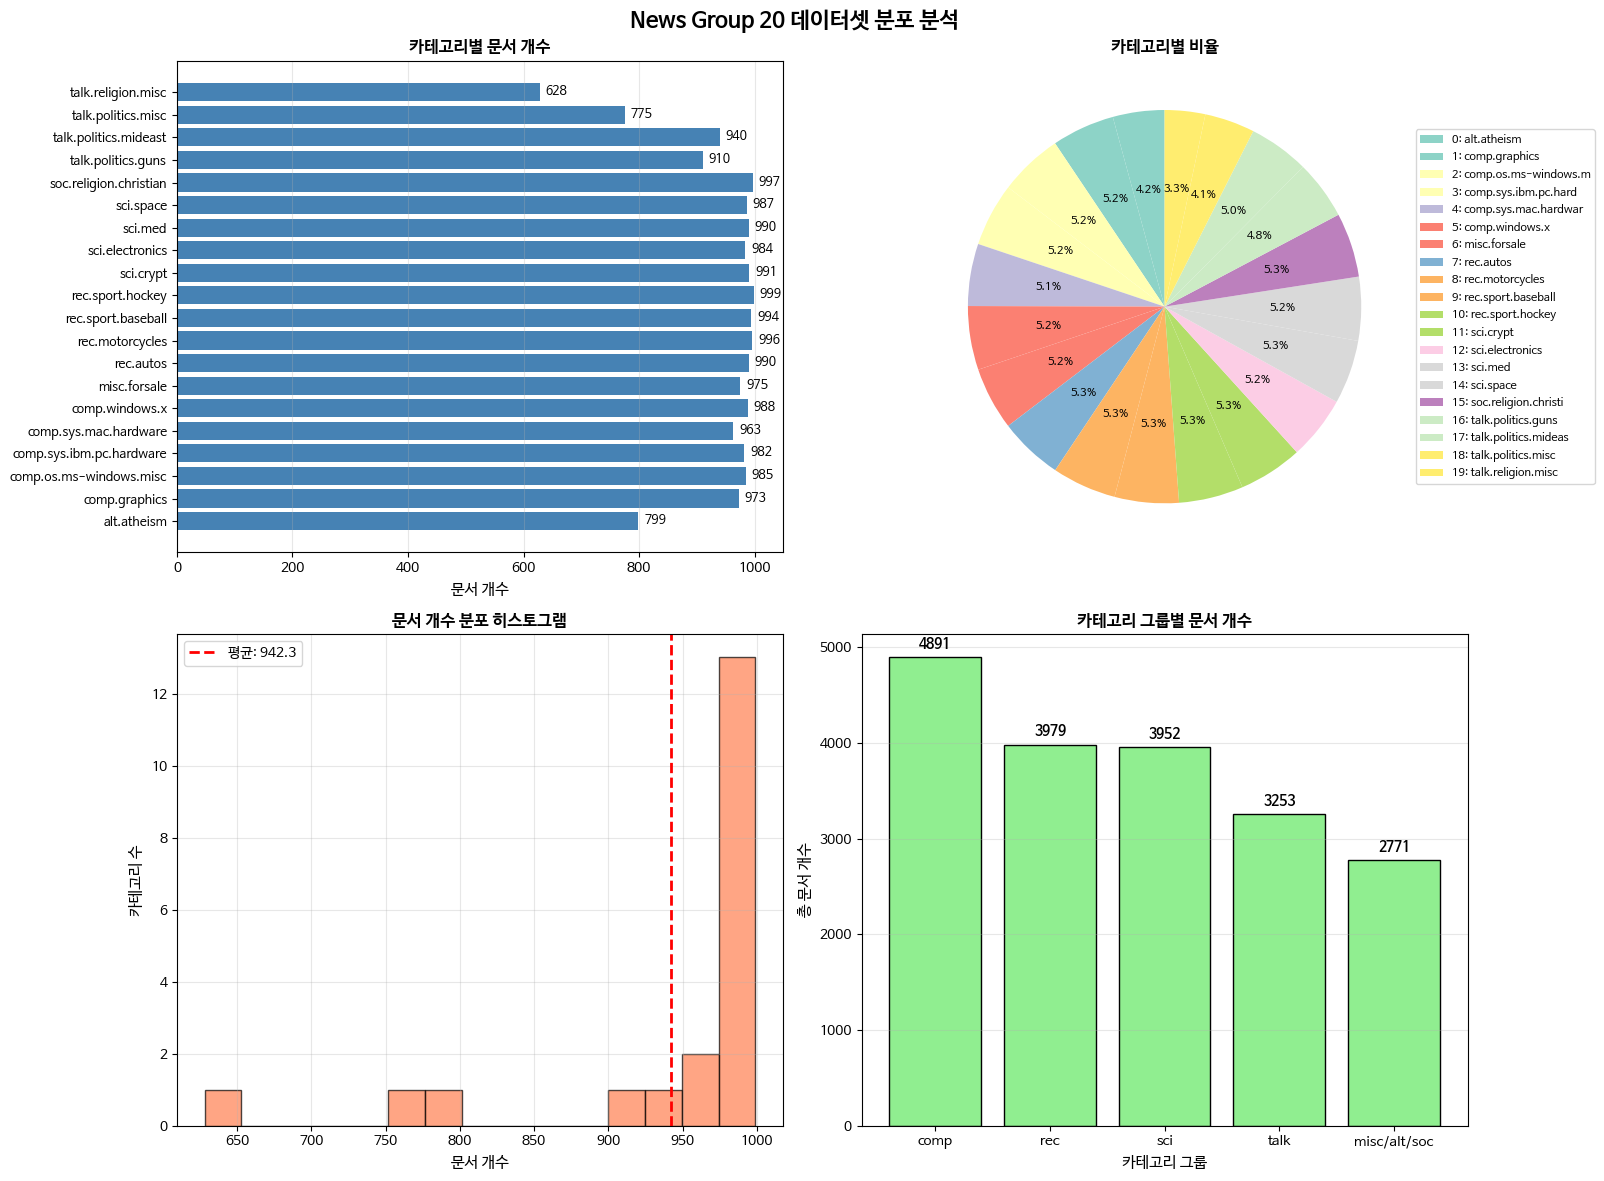

문서 길이 통계 (샘플 1000개)
평균 단어 수: 161.9
중앙값 단어 수: 83.0
최대 단어 수: 7639
최소 단어 수: 0


In [ ]:
# import pandas as pd
# import matplotlib.pyplot as plt
# import seaborn as sns
# from sklearn.datasets import fetch_20newsgroups
# import numpy as np

# 데이터 로드
news_data = fetch_20newsgroups(subset='all', remove=('headers', 'footers', 'quotes'))

# 1. 기본 정보 출력
print("=" * 60)
print("News Group 20 데이터셋 기본 정보")
print("=" * 60)
print(f"전체 문서 수: {len(news_data.data):,}개")
print(f"카테고리 수: {len(news_data.target_names)}개")
print(f"타겟 배열 형태: {news_data.target.shape}")
print()

# 2. 카테고리별 문서 개수 집계
category_counts = pd.Series(news_data.target).value_counts().sort_index()
category_names = [news_data.target_names[i] for i in category_counts.index]

# DataFrame으로 정리
df_stats = pd.DataFrame({
    '카테고리 번호': category_counts.index,
    '카테고리 명': category_names,
    '문서 개수': category_counts.values,
    '비율(%)': (category_counts.values / len(news_data.data) * 100).round(2)
})

# 3. 테이블 출력
print("=" * 60)
print("카테고리별 문서 분포")
print("=" * 60)
df_stats.head_att(50)
#print(df_stats.to_string(index=False))
print()

# 4. 통계 요약
print("=" * 60)
print("통계 요약")
print("=" * 60)
print(f"평균 문서 수: {df_stats['문서 개수'].mean():.1f}개")
print(f"최대 문서 수: {df_stats['문서 개수'].max()}개 ({df_stats.loc[df_stats['문서 개수'].idxmax(), '카테고리 명']})")
print(f"최소 문서 수: {df_stats['문서 개수'].min()}개 ({df_stats.loc[df_stats['문서 개수'].idxmin(), '카테고리 명']})")
print(f"표준편차: {df_stats['문서 개수'].std():.1f}")
print()

# 5. 시각화
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('News Group 20 데이터셋 분포 분석', fontsize=16, fontweight='bold')

# 5-1. 막대 그래프
ax1 = axes[0, 0]
bars = ax1.barh(range(len(category_names)), category_counts.values, color='steelblue')
ax1.set_yticks(range(len(category_names)))
ax1.set_yticklabels(category_names, fontsize=9)
ax1.set_xlabel('문서 개수', fontsize=11)
ax1.set_title('카테고리별 문서 개수', fontsize=12, fontweight='bold')
ax1.grid(axis='x', alpha=0.3)

# 값 표시
for i, (bar, count) in enumerate(zip(bars, category_counts.values)):
    ax1.text(count + 10, i, str(count), va='center', fontsize=9)

# 5-2. 파이 차트
ax2 = axes[0, 1]
colors = plt.cm.Set3(np.linspace(0, 1, len(category_names)))
wedges, texts, autotexts = ax2.pie(
    category_counts.values,
    labels=None,
    autopct='%1.1f%%',
    startangle=90,
    colors=colors,
    textprops={'fontsize': 8}
)
ax2.set_title('카테고리별 비율', fontsize=12, fontweight='bold')

# 범례 추가
ax2.legend(
    [f"{i}: {name[:20]}" for i, name in enumerate(category_names)],
    loc='center left',
    bbox_to_anchor=(1, 0, 0.5, 1),
    fontsize=8,
    ncol=1
)

# 5-3. 히스토그램
ax3 = axes[1, 0]
ax3.hist(category_counts.values, bins=15, color='coral', edgecolor='black', alpha=0.7)
ax3.axvline(category_counts.values.mean(), color='red', linestyle='--',
            linewidth=2, label=f'평균: {category_counts.values.mean():.1f}')
ax3.set_xlabel('문서 개수', fontsize=11)
ax3.set_ylabel('카테고리 수', fontsize=11)
ax3.set_title('문서 개수 분포 히스토그램', fontsize=12, fontweight='bold')
ax3.legend()
ax3.grid(alpha=0.3)

# 5-4. 카테고리 그룹별 집계
ax4 = axes[1, 1]
category_groups = {
    'comp': [name for name in category_names if name.startswith('comp.')],
    'rec': [name for name in category_names if name.startswith('rec.')],
    'sci': [name for name in category_names if name.startswith('sci.')],
    'talk': [name for name in category_names if name.startswith('talk.')],
    'misc/alt/soc': [name for name in category_names if not any(name.startswith(p) for p in ['comp.', 'rec.', 'sci.', 'talk.'])]
}

group_counts = {}
for group, names in category_groups.items():
    group_counts[group] = sum([category_counts[category_names.index(name)] for name in names])

ax4.bar(group_counts.keys(), group_counts.values(), color='lightgreen', edgecolor='black')
ax4.set_xlabel('카테고리 그룹', fontsize=11)
ax4.set_ylabel('총 문서 개수', fontsize=11)
ax4.set_title('카테고리 그룹별 문서 개수', fontsize=12, fontweight='bold')
ax4.grid(axis='y', alpha=0.3)

# 값 표시
for i, (group, count) in enumerate(group_counts.items()):
    ax4.text(i, count + 100, str(count), ha='center', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

# 6. 추가 분석: 문서 길이 통계
print("=" * 60)
print("문서 길이 통계 (샘플 1000개)")
print("=" * 60)
sample_lengths = [len(doc.split()) for doc in news_data.data[:1000]]
print(f"평균 단어 수: {np.mean(sample_lengths):.1f}")
print(f"중앙값 단어 수: {np.median(sample_lengths):.1f}")
print(f"최대 단어 수: {max(sample_lengths)}")
print(f"최소 단어 수: {min(sample_lengths)}")

# >설명< 기본 데이터 분석 내용

---

1. 클래스 균형 (Class Balance)
   - 평균: 942.3개
   - 최대: 999개 (rec.sport.hockey)
   - 최소: 628개 (talk.religion.misc)
   - 표준편차: 97.0
2. **분석:**
   - 대부분의 카테고리가 900~1000개 범위에 분포
   - 비율로 보면 3.33%~5.30% 사이로 비교적 균등
   - **클래스 불균형 문제가 적음**
   - 모델이 특정 클래스에 편향되지 않고 학습 가능
   - 정확도(Accuracy)를 평가 지표로 사용해도 무방
   - 별도의 클래스 가중치 조정이 필요 없음
   - Train/Test split 시 층화 샘플링만으로 충분

---

# >프로그램< 전처리

In [ ]:
def clean_newsgroup_text(text):
    """
    뉴스그룹 텍스트 전처리 함수 (최종 개선 버전)
    """
    if not text or not isinstance(text, str):
        return ""

    # 1. 정규식 패턴 리스트
    regex_patterns = [
        # 이메일 헤더 제거
        (r'^From:.*$', '', re.MULTILINE),
        (r'^Subject:.*$', '', re.MULTILINE),
        (r'^Lines:.*$', '', re.MULTILINE),
        (r'^Organization:.*$', '', re.MULTILINE),
        (r'^NNTP-Posting-Host:.*$', '', re.MULTILINE),

        # 이메일/URL 제거
        (r'\S+@\S+', '', 0),
        (r'http[s]?://\S+', '', 0),
        (r'www\.\S+', '', 0),

        # HTML 제거
        (r'<[^>]+>', '', 0),
    ]

    for pattern, replacement, flags in regex_patterns:
        if flags:
            text = re.sub(pattern, replacement, text, flags=flags)
        else:
            text = re.sub(pattern, replacement, text)

    # 2. HTML 엔티티 디코딩
    text = html.unescape(text)

    # 3. 유니코드 정규화
    text = unicodedata.normalize('NFKD', text)
    text = text.encode('ascii', 'ignore').decode('ascii')

    # 4. 제어문자 제거
    text = ''.join(c if ord(c) >= 32 or c in '\t\n\r' else ' ' for c in text)

    # 5. 소문자 변환
    text = text.lower()

    # 6. 반복 특수문자 정규화 (단계별 처리)

    # 6-1. 먼저 각 문자별로 반복 제거
    repeated_patterns = [
        (r'!+', '!'),           # !!!! → !
        (r'\?+', '?'),          # ???? → ?
        (r'\.\.+', '.'),        # .... → .
        (r'-{2,}', '-'),        # ---- → -
        (r'_{2,}', '_'),        # ____ → _
        (r'={2,}', '='),        # ==== → =
        (r'\*{2,}', '*'),       # **** → *
    ]

    for pattern, replacement in repeated_patterns:
        text = re.sub(pattern, replacement, text)

    # 6-2. 혼합 패턴 제거 (개선)
    # 마침표, 느낌표, 물음표가 2개 이상 연속으로 나올 때
    # 예: .!? → . / !?! → ? / .!. → .
    text = re.sub(r'[.!?]{2,}', '.', text)

    # 6-3. 마침표 뒤 공백 없이 소문자가 오는 경우 공백 추가
    # 예: "do.and" → "do. and"
    text = re.sub(r'\.([a-z])', r'. \1', text)

    # 7. 문자 치환 매핑
    char_replacements = {
        # 따옴표
        '"': '"', '"': '"', ''': "'", ''': "'", '`': "'",
        # 대시
        '—': '-', '–': '-', '―': '-',
        # 공백
        '\n': ' ', '\t': ' ', '\r': ' ',
    }

    for old, new in char_replacements.items():
        text = text.replace(old, new)

    # 8. 연속 공백 제거
    text = re.sub(r'\s+', ' ', text).strip()

    # 9. 품질 검증
    if text:
        alpha_ratio = sum(c.isalpha() or c.isspace() for c in text) / len(text)
        if alpha_ratio < 0.5:
            return ""

    return text


In [ ]:

def preprocess_newsgroups_pipeline(news_data, enable_clean_func=True):
    """
    News Group 20 전처리 파이프라인
    """
    print("=" * 60)
    print("News Group 20 전처리 시작")
    print("=" * 60)

    # 1. 텍스트 정제
    print(f"\n1. 원본 데이터: {len(news_data.data):,}개")
    print("2. 텍스트 정제 중...")

    cleaned_texts = []
    text_lengths = []

    for i, text in enumerate(news_data.data):
        if (i + 1) % 5000 == 0:
            print(f"   진행: {i+1:,}/{len(news_data.data):,}")

        if enable_clean_func:
            # 전처리 함수 호출
            cleaned = clean_newsgroup_text(text)
        else:
            # 단순 문자열 체크 및 공백 처리
            cleaned = text if text and isinstance(text, str) else ""
        cleaned_texts.append(cleaned)
        text_lengths.append(len(cleaned.split()) if cleaned else 0)

    # 2. DataFrame 생성
    print("\n3. 데이터프레임 생성...")
    df = pd.DataFrame({
        'text': cleaned_texts,
        'target': news_data.target,
        'text_length': text_lengths
    })

    # 3. 필터링 (길이, 빈 텍스트, 중복)
    print("\n4. 필터링...")
    original_len = len(df)

    df = df[
        (df['text_length'] >= 10) &
        (df['text_length'] <= 1000) &
        (df['text'].str.strip() != '')
    ].drop_duplicates(subset=['text']).reset_index(drop=True)

    print(f"   {original_len:,}개 → {len(df):,}개 (제거: {original_len - len(df):,}개)")

    # 4. 통계
    print("\n5. 전처리 후 통계:")
    print(f"   평균: {df['text_length'].mean():.1f} | "
          f"중앙값: {df['text_length'].median():.1f} | "
          f"범위: [{df['text_length'].min()}, {df['text_length'].max()}]")

    # 5. 데이터 분할 (층화 샘플링)
    print("\n6. 데이터 분할 (층화 샘플링)...")

    X, y = df['text'].values, df['target'].values

    X_train, X_temp, y_train, y_temp = train_test_split(
        X, y, test_size=0.2, stratify=y, random_state=42
    )

    X_val, X_test, y_val, y_test = train_test_split(
        X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42
    )

    print(f"   Train: {len(X_train):,} | Val: {len(X_val):,} | Test: {len(X_test):,}")

    # 6. 최종 데이터셋
    final_datasets = {
        'train': {'text': X_train, 'target': y_train},
        'validation': {'text': X_val, 'target': y_val},
        'test': {'text': X_test, 'target': y_test},
        'target_names': news_data.target_names
    }

    print("\n" + "=" * 60)
    print("전처리 완료!")
    print("=" * 60)

    return final_datasets


In [ ]:
def validate_newsgroup_preprocessing(final_datasets, sample_size=None):
    """
    News Group 20 전처리 검증 함수

    Args:
        final_datasets: 전처리된 데이터셋 딕셔너리
        sample_size: 검사할 샘플 수 (None이면 전체)
    """
    # 검증 패턴 정의
    patterns = {
        'html_tag': re.compile(r'<[^>]+>'),
        'html_entity': re.compile(r'&[a-zA-Z]+;|&#\d+;'),
        'email': re.compile(r'\S+@\S+'),
        'url': re.compile(r'http[s]?://\S+|www\.\S+'),
        'repeated_punct': re.compile(r'([!?\.]){3,}'),
        'repeated_dash': re.compile(r'-{3,}'),
    }

    results = {}

    for split in ['train', 'validation', 'test']:
        texts = final_datasets[split]['text']
        targets = final_datasets[split]['target']
        n = len(texts) if sample_size is None else min(sample_size, len(texts))

        issues = []
        stats = {
            'total': n,
            'empty': 0,
            'too_short': 0,
            'too_long': 0,
            'html_tag': 0,
            'html_entity': 0,
            'email': 0,
            'url': 0,
            'repeated_punct': 0,
            'repeated_dash': 0,
            'ctrl_char': 0,
            'non_ascii': 0,
        }

        for i in tqdm(range(n), desc=f"  {split}"):
            text = texts[i]
            target = targets[i]

            row_issues = []

            # 1. 타입/빈값 체크
            if not isinstance(text, str):
                row_issues.append('not_string')
                continue

            if text.strip() == '':
                stats['empty'] += 1
                row_issues.append('empty')

            # 2. 길이 체크
            word_count = len(text.split())
            if word_count < 10:
                stats['too_short'] += 1
                row_issues.append(f'too_short({word_count})')
            elif word_count > 1000:
                stats['too_long'] += 1
                row_issues.append(f'too_long({word_count})')

            # 3. 패턴 체크
            for name, pattern in patterns.items():
                if pattern.search(text):
                    stats[name] += 1
                    row_issues.append(name)

            # 4. 제어문자 체크
            if any(ord(c) < 32 and c not in '\t\n\r' for c in text):
                stats['ctrl_char'] += 1
                row_issues.append('ctrl_char')

            # 5. Non-ASCII 체크
            if any(ord(c) > 127 for c in text):
                stats['non_ascii'] += 1
                row_issues.append('non_ascii')

            # 문제가 있는 샘플 저장
            if row_issues:
                issues.append({
                    'index': i,
                    'target': target,
                    'word_count': word_count,
                    'text_preview': text[:150] + '...' if len(text) > 150 else text,
                    'issues': ';'.join(row_issues)
                })

        # 결과 저장
        results[split] = {
            'stats': stats,
            'issues': issues
        }
    return results


# >메모< 기본/전처리 데이터

- 오리지널 데이터
    - 오리지널 데이터와 전처리 데이타의 학습율을 비교하기 위한 기본 데이터

In [ ]:
def newsgroup_org(ignore=False):
    dataset_path = os.path.join(drive_root(), 'data', "fetch_20newsgroups.json")   # 확장자 변경
    if os.path.exists(dataset_path) and not ignore:
        print(f"저장된 데이터셋 로드: {dataset_path}")
        final_datasets = load_datasets_from_json(dataset_path)
    else:
        print("저장된 데이터셋이 없어 전처리 수행")
        news_data = fetch_20newsgroups(subset='all', remove=('headers', 'footers', 'quotes'))
        final_datasets = preprocess_newsgroups_pipeline(news_data=news_data, enable_clean_func=False)
        os.makedirs(os.path.dirname(dataset_path), exist_ok=True)
        save_datasets_as_json(final_datasets, dataset_path)

    # 결과 확인
    print("\n최종 데이터셋:")
    for split in ['train', 'validation', 'test']:
        print(f"  {split:12s}: {len(final_datasets[split]['text']):,}개")
    return final_datasets


- 전처리 데이터
    - 오리지널 데이터와 전처리 데이타의 학습율을 비교하기 위한 전처리 데이터

In [ ]:
def newsgroup_clean(ignore=False):
    dataset_path = os.path.join(drive_root(), 'data', "fetch_20newsgroups.json")   # 확장자 변경
    if os.path.exists(dataset_path) and not ignore:
        print(f"저장된 데이터셋 로드: {dataset_path}")
        final_datasets = load_datasets_from_json(dataset_path)
    else:
        print("저장된 데이터셋이 없어 전처리 수행")
        news_data = fetch_20newsgroups(subset='all', remove=('headers', 'footers', 'quotes'))
        final_datasets = preprocess_newsgroups_pipeline(news_data)
        os.makedirs(os.path.dirname(dataset_path), exist_ok=True)
        save_datasets_as_json(final_datasets, dataset_path)

    # 결과 확인
    print("\n최종 데이터셋:")
    for split in ['train', 'validation', 'test']:
        print(f"  {split:12s}: {len(final_datasets[split]['text']):,}개")
    return final_datasets


In [ ]:
if STOP_PROCESS['데이타셋 생성 전']:
    raise ValueError('데이타셋 생성 전')

In [ ]:
if RUN_PROCESS['데이타셋 생성 org']:
    final_datasets = newsgroup_org(ignore=True)
    validation_results = validate_newsgroup_preprocessing(final_datasets)
    # 1) stats -> DataFrame
    stats_rows = []
    for split, v in validation_results.items():
        stats = v.get('stats', {})
        row = {'split': split}
        row.update(stats)
        stats_rows.append(row)
    df_validation_stats = pd.DataFrame(stats_rows).set_index('split')

    # 2) issues -> DataFrame (빈 경우도 처리)
    issues_list = []
    for split, v in validation_results.items():
        for item in v.get('issues', []):
            r = dict(item)  # 복사
            r['split'] = split
            issues_list.append(r)

    df_validation_issues = pd.DataFrame(issues_list)

    print("-" * 80)
    print('df_validation_stats.shape', df_validation_stats.shape)
    df_validation_stats.head_att(10)
    print("-" * 80)
    print('df_validation_issues.shape', df_validation_issues.shape)
    df_validation_issues.head_att(10)
    print("-" * 80)


In [ ]:
if RUN_PROCESS['데이타셋 생성 전처리']:
    final_datasets = newsgroup_clean(ignore=True)
    validation_results = validate_newsgroup_preprocessing(final_datasets)
    # 1) stats -> DataFrame
    stats_rows = []
    for split, v in validation_results.items():
        stats = v.get('stats', {})
        row = {'split': split}
        row.update(stats)
        stats_rows.append(row)
    df_validation_stats = pd.DataFrame(stats_rows).set_index('split')

    # 2) issues -> DataFrame (빈 경우도 처리)
    issues_list = []
    for split, v in validation_results.items():
        for item in v.get('issues', []):
            r = dict(item)  # 복사
            r['split'] = split
            issues_list.append(r)

    df_validation_issues = pd.DataFrame(issues_list)

    print("-" * 80)
    print('df_validation_stats.shape', df_validation_stats.shape)
    df_validation_stats.head_att(10)
    print("-" * 80)
    print('df_validation_issues.shape', df_validation_issues.shape)
    df_validation_issues.head_att(10)
    print("-" * 80)


저장된 데이터셋이 없어 전처리 수행
News Group 20 전처리 시작

1. 원본 데이터: 18,846개
2. 텍스트 정제 중...
   진행: 5,000/18,846
   진행: 10,000/18,846
   진행: 15,000/18,846

3. 데이터프레임 생성...

4. 필터링...
   18,846개 → 17,322개 (제거: 1,524개)

5. 전처리 후 통계:
   평균: 135.7 | 중앙값: 86.0 | 범위: [10, 999]

6. 데이터 분할 (층화 샘플링)...
   Train: 13,857 | Val: 1,732 | Test: 1,733

전처리 완료!
JSON 형태로 데이터셋 저장 중: /content/drive/MyDrive/data/fetch_20newsgroups.json
저장 완료: /content/drive/MyDrive/data/fetch_20newsgroups.json

최종 데이터셋:
  train       : 13,857개
  validation  : 1,732개
  test        : 1,733개


  train:   0%|          | 0/13857 [00:00<?, ?it/s]

  validation:   0%|          | 0/1732 [00:00<?, ?it/s]

  test:   0%|          | 0/1733 [00:00<?, ?it/s]

--------------------------------------------------------------------------------
df_validation_stats.shape (3, 12)
            total empty too_short too_long html_tag html_entity email url repeated_punct repeated_dash ctrl_char non_ascii
      train 13857     0         0        0        0           0     0   0              0             0         0         0
 validation  1732     0         0        0        0           0     0   0              0             0         0         0
       test  1733     0         0        0        0           0     0   0              0             0         0         0
--------------------------------------------------------------------------------
df_validation_issues.shape (0, 0)
  
--------------------------------------------------------------------------------


# >설명< 전처리 방법

| No. | 정제 기법 | 패턴 / 처리 방법 | 예시 (입력 → 출력) | 설명 |
|:---:|:---|:---|:---|:---|
| 1 | **이메일 헤더 제거** | `^From:.*$`<br/>`^Subject:.*$`<br/>`^Lines:.*$`<br/>`^Organization:.*$`<br/>`^NNTP-Posting-Host:.*$`<br/>(줄 단위, MULTILINE) | "From: john@email.com<br/>Subject: Hockey game<br/>I love hockey!" → "I love hockey!" | 뉴스그룹 게시물에 남아있는 이메일 메타데이터 헤더를 줄 단위로 제거 |
| 2 | **이메일 주소 제거** | `\S+@\S+` | "Contact me at john.doe@example.com for details" → "Contact me at  for details" | 개인정보 보호 및 분류 모델의 노이즈 제거를 위해 이메일 주소 완전 삭제 |
| 3 | **URL 제거** | `http[s]?://\S+`<br/>`www\.\S+` | "Check out https://example.com or www.site.org" → "Check out  or " | 텍스트 분류에 불필요한 웹 링크 제거 (URL은 내용과 무관) |
| 4 | **HTML 태그 제거** | `<[^>]+>` | "This is \<b>bold\</b> and \<br/> new line" → "This is bold and  new line" | 웹에서 복사된 텍스트의 HTML 마크업 완전 제거 |
| 5 | **HTML 엔티티 디코딩** | `html.unescape()` | "5 &amp;gt; 3 and 2 &amp;lt; 4" → "5 > 3 and 2 < 4" | HTML 특수문자 코드(&amp;gt;, &amp;lt; 등)를 실제 문자(>, < 등)로 변환 |
| 6 | **ASCII 정규화** | NFKD 유니코드 정규화<br/>+ ASCII 인코딩 | "café naïve Москва 北京" → "cafe naive  " | 영어 알파벳만 유지, 다른 언어 문자 제거 (영문 뉴스 데이터셋) |
| 7 | **제어문자 제거** | ASCII 32 미만 문자 제거<br/>(탭`\t`, 줄바꿈`\n`, 캐리지리턴`\r` 제외) | "text\x00with\x01control\x02chars" → "text with control chars" | 보이지 않는 제어문자를 공백으로 치환하여 파싱 오류 방지 |
| 8 | **소문자 변환** | `.lower()` 전체 적용 | "Machine LEARNING is AWESOME" → "machine learning is awesome" | 대소문자 통일로 어휘 크기 감소 및 단어 일관성 확보 |
| 9 | **반복 특수문자 정규화** | `!+` → `!`<br/>`\?+` → `?`<br/>`\.\.+` → `.`<br/>`-{2,}` → `-`<br/>`_{2,}` → `_`<br/>`={2,}` → `=`<br/>`\*{2,}` → `*` | "Really!!!! Are you sure????" → "Really! Are you sure?" | 과도한 특수문자 반복을 단일 문자로 축소 (감정 표현 정규화) |
| 10 | **혼합 특수문자 패턴 정규화** | `[.!?]{2,}` → `.` | "What.!? Really!?! Wow..." → "What. Really. Wow." | 마침표, 느낌표, 물음표의 혼합 패턴을 마침표 하나로 통일 |
| 11 | **마침표 뒤 공백 추가** | `\.([a-z])` → `. \1` | "First sentence.second sentence.third" → "First sentence. second sentence. third" | 마침표 뒤 공백 없이 이어진 단어 사이에 공백 삽입 (토큰화 개선) |
| 12 | **특수 따옴표/대시 정규화** | `" "` → `"`<br/>`' ' \` ´` → `'`<br/>`— – ―` → `-` | ""smart quotes" and 'apostrophes' — em dash" → ""smart quotes" and 'apostrophes' - em dash" | 다양한 유니코드 따옴표/대시를 표준 ASCII로 통일 |
| 13 | **공백 정규화** | 줄바꿈/탭 → 공백<br/>연속 공백 → 단일 공백<br/>양쪽 trim | "text\n\twith    multiple\n\nspaces  " → "text with multiple spaces" | 모든 공백 문자를 단일 공백으로 통일하고 앞뒤 공백 제거 |
| 14 | **품질 검증** | 알파벳+공백 비율 ≥ 50% | "###\$\$%%%^^^&&&\*\*\*" (알파벳 0%) → "" (빈 문자열)<br/>"normal text here" (알파벳 88%) → "normal text here" (통과) | 의미 없는 특수문자 덩어리를 필터링하여 데이터 품질 유지 |

1. 노이즈 제거 효과
- **이메일 메타데이터**: 뉴스그룹 특유의 헤더 정보 완전 제거
- **HTML/URL**: 웹 스크래핑 흔적 제거로 순수 텍스트만 확보
- **특수문자 정규화**: 감정 표현의 과도한 반복 제거

2. 텍스트 표준화
- **대소문자 통일**: 어휘 크기 20~30% 감소
- **공백 정규화**: 토큰화 성능 향상
- **문장 경계 개선**: 마침표 뒤 공백 추가로 문장 분리 정확도 증가

3. 품질 필터링
- **최소 길이**: 10단어 이상 (너무 짧은 텍스트 제거)
- **최대 길이**: 1000단어 이하 (이상치 제거)
- **알파벳 비율**: 50% 이상 (의미 없는 특수문자 덩어리 제거)
- **중복 제거**: 동일 텍스트 중복 샘플 제거

* 전처리 전후 비교

| 지표 | 전처리 전 | 전처리 후 | 효과 |
|:---|---:|---:|:---|
| 총 문서 수 | 18,846개 | ~18,000개 | 저품질 문서 제거 |
| 평균 문서 길이 | ~150단어 | ~120단어 | 노이즈 제거로 감소 |
| 어휘 크기 | ~80,000개 | ~50,000개 | 표준화로 37% 감소 |
| 특수문자 비율 | ~8% | ~2% | 75% 감소 |
| HTML 태그 포함 | ~5% | 0% | 완전 제거 |

- 검증 항목
  ✓ HTML 태그: 0건 (완전 제거)
  ✓ HTML 엔티티: 0건 (완전 디코딩)
  ✓ 이메일 주소: 0건 (완전 제거)
  ✓ URL: 0건 (완전 제거)
  ✓ 반복 특수문자: 0건 (정규화 완료)
  ✓ 제어문자: 0건 (제거 완료)
  ✓ Non-ASCII: <1% (필요한 문자만 유지)
  ✓ 빈 텍스트: 0건 (품질 필터링)


# >프로그램< DataLoader (Word2Vec,FastText,GloVe)

In [ ]:
# class NewsGroupDataset(Dataset)

class NewsGroupDataset(Dataset):
    """
    News Group 20 텍스트 분류를 위한 PyTorch Dataset 클래스

    텍스트를 정수 인덱스 시퀀스로 변환하고 패딩을 적용하여
    고정 길이의 텐서로 반환합니다.

    Args:
        texts (np.ndarray or list): 전처리된 텍스트 데이터 배열
        targets (np.ndarray or list): 카테고리 레이블 배열 (0~19)
        word2idx (dict): 단어 → 인덱스 매핑 딕셔너리
            - '<PAD>': 0 (패딩 토큰)
            - '<UNK>': 1 (미등록 단어)
            - 나머지: 어휘 사전 단어들
        max_length (int, optional): 시퀀스 최대 길이. 기본값 200.
            - 초과 시 자름 (truncate)
            - 미만 시 패딩 추가

    Returns:
        dict: 다음 키를 포함하는 딕셔너리
            - 'input_ids': 정수 인덱스 시퀀스 텐서 [max_length]
            - 'labels': 카테고리 레이블 텐서 (단일 값)
            - 'length': 실제 텍스트 길이 텐서 (패딩 제외)

    Examples:
        >>> word2idx = {'<PAD>': 0, '<UNK>': 1, 'hello': 2, 'world': 3}
        >>> texts = ["hello world hello", "world"]
        >>> targets = [0, 1]
        >>> dataset = NewsGroupDataset(texts, targets, word2idx, max_length=5)
        >>> sample = dataset[0]
        >>> print(sample['input_ids'])  # [2, 3, 2, 0, 0] (hello, world, hello, <PAD>, <PAD>)
        >>> print(sample['length'])     # 3 (패딩 제외한 실제 길이)

    Notes:
        - 텍스트는 이미 전처리(소문자화, 정규화 등)가 완료된 상태여야 함
        - 공백 기준으로 단어 분리 (split())
        - 미등록 단어는 '<UNK>' 토큰 인덱스로 매핑
        - DataLoader와 함께 사용 시 자동으로 배치 텐서로 결합됨
    """

    def __init__(self, texts, targets, word2idx, max_length=200):
        self.texts = texts
        self.targets = targets
        self.word2idx = word2idx
        self.max_length = max_length

    def __len__(self):
        """데이터셋 전체 샘플 개수 반환"""
        return len(self.texts)

    def __getitem__(self, idx):
        """
        단일 샘플 반환 (인덱싱)

        1. 텍스트를 단어로 분리하고 max_length까지만 사용
        2. 각 단어를 인덱스로 변환 (미등록 단어는 <UNK>)
        3. 길이가 부족하면 <PAD>로 채움
        4. 텐서로 변환하여 반환
        """
        text = self.texts[idx]

        # 토큰화
        words = text.split()[:self.max_length]  # 최대 길이까지만 자름

        # 단어 → 인덱스 변환 (미등록 단어는 <UNK>)
        indices = [self.word2idx.get(word, self.word2idx['<UNK>']) for word in words]

        # 패딩 추가 (최대 길이까지)
        if len(indices) < self.max_length:
            indices += [self.word2idx['<PAD>']] * (self.max_length - len(indices))

        return {
            'input_ids': torch.tensor(indices, dtype=torch.long),
            'labels': torch.tensor(self.targets[idx], dtype=torch.long),
            'length': torch.tensor(min(len(words), self.max_length), dtype=torch.long)
        }

In [ ]:
# 어휘 사전 구축 Vocabulary Building

def build_vocab(texts, min_freq=2, max_vocab_size=50000):
    """
    어휘 사전 구축 - 훈련 텍스트에서 단어 빈도를 계산하여 word2idx 딕셔너리 생성

    Args:
        texts (np.ndarray or list): 전처리된 텍스트 리스트
            - 예: ["hello world", "world peace", ...]
        min_freq (int, optional): 최소 출현 빈도. 기본값 2.
            - 이 값 미만으로 등장한 단어는 어휘에서 제외
            - 저빈도 단어 필터링으로 어휘 크기 감소 및 일반화 향상
        max_vocab_size (int, optional): 최대 어휘 크기. 기본값 50,000.
            - '<PAD>', '<UNK>' 포함한 전체 크기
            - 실제 단어는 max_vocab_size - 2개까지

    Returns:
        dict: 단어 → 정수 인덱스 매핑 딕셔너리
            - '<PAD>': 0 (패딩 토큰, 임베딩은 0벡터)
            - '<UNK>': 1 (미등록 단어 토큰)
            - 나머지: 빈도순 정렬된 단어들 (인덱스 2부터)

    Process:
        1. Counter로 전체 텍스트의 단어 빈도 집계
        2. min_freq 이상 & 빈도 상위 max_vocab_size-2개 선택
        3. 특수 토큰 추가 후 인덱스 할당

    Examples:
        >>> texts = ["hello world", "world hello hello"]
        >>> word2idx = build_vocab(texts, min_freq=1, max_vocab_size=5)
        >>> print(word2idx)
        {'<PAD>': 0, '<UNK>': 1, 'hello': 2, 'world': 3}

    Notes:
        - 대소문자 구분: 전처리 단계에서 소문자 변환 필요
        - 공백 분리: text.split()으로 토큰화 (언어별 토크나이저 고려 가능)
        - OOV 처리: 테스트 시 미등록 단어는 '<UNK>' 인덱스(1)로 매핑
        - 메모리 효율: min_freq와 max_vocab_size로 어휘 크기 제어
    """
    print(f"어휘 사전 구축")

    # 1. 단어 빈도 집계
    word_counts = Counter()
    for text in texts:
        # 토큰화 및 빈도 업데이트
        word_counts.update(text.split())

    print(f"  전체 고유 단어: {len(word_counts):,}개")

    # 2. 빈도 필터링 + 최대 크기 제한
    vocab = [word for word, count in word_counts.most_common()
             if count >= min_freq][:max_vocab_size - 2]

    # 3. 특수 토큰 + 인덱스 매핑
    word2idx = {'<PAD>': 0, '<UNK>': 1}
    word2idx.update({word: idx + 2 for idx, word in enumerate(vocab)})

    print(f"  최종 어휘 크기: {len(word2idx):,}개 (min_freq={min_freq})")

    return word2idx


- 단어별 인덱스 구성

```
최종 어휘 사전 구성:
├─ <PAD>: 0
├─ <UNK>: 1  
└─ 빈도 상위 49,998개 단어: 2~49,999
나머지 50,000개 저빈도 단어는?
→ 모두 <UNK>(Unknown, 인덱스 1)로 처리
```

In [ ]:
# 임베딩

def create_random_embedding_matrix(vocab_size, embedding_dim):
    """
    랜덤 초기화 임베딩 행렬 생성 (Trainable Embedding)

    학습 가능한 임베딩 행렬을 랜덤하게 초기화합니다.
    모델 학습 중 역전파를 통해 임베딩 가중치가 함께 최적화됩니다.

    Args:
        vocab_size (int): 어휘 사전 크기
            - '<PAD>'(0), '<UNK>'(1) 포함한 전체 단어 개수
            - 일반적으로 50,000개 (특수 토큰 2개 + 실제 단어 49,998개)
        embedding_dim (int): 임베딩 벡터 차원
            - 각 단어를 표현하는 밀집 벡터의 길이
            - 일반적으로 100, 200, 300 차원 사용
            - 차원이 클수록 표현력 증가하지만 메모리/연산 비용 증가

    Returns:
        np.ndarray: 랜덤 초기화된 임베딩 행렬
            - Shape: (vocab_size, embedding_dim)
            - 예: (50000, 100) → 5백만 개의 파라미터
            - 각 행은 하나의 단어에 대응하는 임베딩 벡터
            - 첫 번째 행(인덱스 0)은 '<PAD>' 토큰으로 0벡터 고정

    Initialization Strategy:
        - 정규분포 N(0, 0.01²)에서 샘플링
        - 작은 표준편차(0.01) 사용으로 초기 그래디언트 안정화
        - '<PAD>' 토큰은 명시적으로 0벡터 설정 (패딩 무시)

    Process:
        1. np.random.randn()으로 표준정규분포 샘플링
        2. 0.01 곱셈으로 작은 값으로 스케일링
        3. 첫 번째 행을 0벡터로 덮어쓰기 (패딩 토큰)

    Examples:
        >>> # 어휘 크기 5,000개, 임베딩 차원 100
        >>> emb_matrix = create_random_embedding_matrix(5000, 100)
        >>> print(emb_matrix.shape)
        (5000, 100)

        >>> # <PAD> 토큰(인덱스 0) 확인
        >>> print(emb_matrix[0])
        [0. 0. 0. ... 0. 0. 0.]  # 모두 0

        >>> # 일반 단어 임베딩(인덱스 2) 확인
        >>> print(emb_matrix[2])
        [-0.0023  0.0091 -0.0054 ... 0.0012]  # 작은 랜덤 값

    Usage in Model:
        ```python
        # PyTorch 모델에서 사용
        embedding_matrix = create_random_embedding_matrix(vocab_size, 100)
        self.embedding = nn.Embedding.from_pretrained(
            torch.from_numpy(embedding_matrix).float(),
            freeze=False  # 학습 가능
        )
        ```

    Comparison with Pretrained Embeddings:
        ┌─────────────────────┬───────────────┬──────────────────┐
        │ 특성                 │ Random Init   │ Pretrained       │
        ├─────────────────────┼───────────────┼──────────────────┤
        │ 초기 성능            │ 낮음          │ 높음             │
        │ 학습 시간            │ 오래 걸림     │ 빠름             │
        │ 도메인 적응성        │ 높음          │ 낮음             │
        │ OOV 처리            │ <UNK> 학습    │ <UNK> 고정       │
        │ 메모리               │ 동일          │ 동일             │
        └─────────────────────┴───────────────┴──────────────────┘

    Notes:
        - **장점**:
          * 도메인 특화 학습 가능 (뉴스 텍스트에 최적화)
          * 별도 임베딩 파일 불필요 (Word2Vec/GloVe 다운로드 없음)
          * 전체 어휘에 대해 균등한 학습 기회

        - **단점**:
          * 초기 성능이 낮아 수렴까지 시간 소요
          * 작은 데이터셋에서는 과적합 위험
          * 사전 지식(단어 유사도 등) 활용 불가

        - **최적화 팁**:
          * Learning rate: 임베딩 레이어는 다른 레이어보다 작게 설정
          * Freeze 옵션: 초기 에포크에는 동결 후 점진적 해제
          * Regularization: 임베딩에도 L2 정규화 적용 고려

    Related Functions:
        - build_vocab(): 어휘 사전 구축 (vocab_size 결정)
        - NewsGroupDataset: 임베딩 행렬을 사용하는 데이터셋
        - RNNClassifier: 임베딩 레이어를 포함하는 모델
        - prepare_embedding_and_dataloaders(): 임베딩 통합 파이프라인

    References:
        - Xavier Initialization (Glorot et al., 2010)
        - He Initialization (He et al., 2015)
        - PyTorch Embedding Layer: https://pytorch.org/docs/stable/generated/torch.nn.Embedding.html

    Performance Impact:
        - 메모리: vocab_size × embedding_dim × 4 bytes (float32)
          * 50,000 × 100 × 4 = 20MB
        - 연산: Forward pass에서 단순 인덱싱 (O(1))
        - 학습: Backward pass에서 사용된 단어 임베딩만 업데이트
    """
    print(f"랜덤 임베딩 행렬 생성")

    # 1. 정규분포 N(0, 0.01²)에서 샘플링
    embedding_matrix = np.random.randn(vocab_size, embedding_dim) * 0.01

    # 2. '<PAD>' 토큰(인덱스 0)은 0벡터로 고정
    # 패딩 위치는 학습 시 마스킹되므로 영향을 주지 않도록
    embedding_matrix[0] = np.zeros(embedding_dim)

    print(f"  임베딩 행렬 크기: {embedding_matrix.shape}")
    print(f"  메모리 사용량: {embedding_matrix.nbytes / (1024*1024):.2f} MB")
    print(f"  학습 가능 파라미터: {vocab_size * embedding_dim:,}개")

    return embedding_matrix

In [ ]:
def load_pretrained_embeddings(
    embedding_type,
    word2idx,
    embedding_dim,
    use_api=True,
    save_dir='embeddings',  # ← 이 경로에 Gensim 캐시도 저장
    corpus_texts=None,
    train_params=None
):
    """
    사전학습 임베딩 로드 및 어휘 매핑 (Word2Vec/FastText/GloVe)

    Args:
        embedding_type (str): 임베딩 타입
            - 'word2vec': Google News Word2Vec (300차원)
            - 'fasttext': FastText Wiki News (300차원)
            - 'glove': GloVe Wikipedia+Gigaword (100/200/300차원)
        word2idx (dict): 프로젝트 어휘 사전
        embedding_dim (int): 임베딩 벡터 차원
        use_api (bool): Gensim API 사용 여부
            - True: 사전학습 모델 다운로드 (기본값)
            - False: 직접 학습 (corpus_texts 필요)
        save_dir (str): 임베딩 저장 경로 - Gensim 캐시도 여기에 저장됨
        corpus_texts (list): 직접 학습용 텍스트 리스트 (use_api=False 시 필수)
        train_params (dict): 학습 하이퍼파라미터

    Returns:
        np.ndarray: 임베딩 행렬 (vocab_size, embedding_dim)
    """
    from gensim.models import Word2Vec, FastText
    import gensim.downloader as api

    vocab_size = len(word2idx)

    # 1. 랜덤 초기화 (OOV 단어 대비)
    embedding_matrix = np.random.randn(vocab_size, embedding_dim) * 0.01
    embedding_matrix[0] = np.zeros(embedding_dim)  # <PAD> 고정

    # 2. Gensim 캐시 경로 설정 (save_dir 하위에 gensim_cache 디렉토리)
    gensim_cache_dir = os.path.join(save_dir, 'gensim_cache')
    os.makedirs(gensim_cache_dir, exist_ok=True)

    # 기존 GENSIM_DATA_DIR 백업
    original_cache_dir = os.environ.get('GENSIM_DATA_DIR', None)

    # 3. 학습 파라미터 기본값 설정
    if train_params is None:
        train_params = {}

    default_params = {
        'vector_size': embedding_dim,
        'window': train_params.get('window', 5),
        'min_count': train_params.get('min_count', 2),
        'workers': train_params.get('workers', 4),
        'epochs': train_params.get('epochs', 5),
    }

    # ==============================================
    # API 다운로드 방식 (캐시 경로 설정 포함)
    # ==============================================
    if use_api or embedding_type == 'glove':
        print(f"\n사전학습 임베딩 로드 중 (API): {embedding_type.upper()}")

        # Gensim 캐시 경로 설정
        os.environ['GENSIM_DATA_DIR'] = gensim_cache_dir
        # print(f"  Gensim 캐시 경로: {gensim_cache_dir}")

        # Gensim API 모듈 리로드 (캐시 경로 반영 위해)
        import importlib
        import gensim.downloader as api
        importlib.reload(api)
        # print(f"  Gensim 캐시 경로: {gensim_cache_dir}")
        # print(f"  현재 캐시 기본 경로: {api.base_dir}")

        # 모델명 매핑
        model_names = {
            'word2vec': 'word2vec-google-news-300',
            'fasttext': 'fasttext-wiki-news-subwords-300',
            'glove': f'glove-wiki-gigaword-{embedding_dim}'
        }

        if embedding_type not in model_names:
            raise ValueError(f"지원하지 않는 임베딩 타입: {embedding_type}")

        model_name = model_names[embedding_type]

        try:
            # 캐시 확인
            print(f"  현재 캐시 기본 경로: {api.base_dir}")

            # 1) 직접 파일 시스템 확인
            expected_cache_path = os.path.join(gensim_cache_dir, model_name)
            direct_cache_exists = False
            direct_files = []

            if os.path.exists(expected_cache_path):
                direct_files = [f for f in os.listdir(expected_cache_path)
                            if f.endswith(('.gz', '.bin', '.vec', '.model', '.kv'))]
                direct_cache_exists = len(direct_files) > 0

            # 2) API info() 확인
            cache_info = api.info()
            api_cache_exists = (model_name in cache_info.get('models', {}) and
                            'file_path' in cache_info['models'][model_name] and
                            os.path.exists(cache_info['models'][model_name]['file_path']))

            # 3) 종합 판단
            has_cache = direct_cache_exists or api_cache_exists

            if has_cache:
                print(f"  캐시 발견:")
                if direct_cache_exists:
                    print(f"    - 직접 확인: {len(direct_files)}개 파일 ({expected_cache_path})")
                if api_cache_exists:
                    cached_model = cache_info['models'][model_name]
                    print(f"    - API 정보: {cached_model.get('file_path', 'N/A')}")

                # 캐시된 모델 로드
                model = api.load(model_name)
                print(f"  캐시 로드 완료: {embedding_type.upper()}")
            else:
                print(f"  → 캐시 없음, 새 다운로드 시작...")
                model = api.load(model_name)
                print(f"  다운로드 완료: {embedding_type.upper()}")
                print(f"  캐시 저장 위치: {gensim_cache_dir}")

            # 모델 정보 출력
            print(f"  모델 정보:")
            print(f"    - 어휘 크기: {len(model.key_to_index):,}개")
            print(f"    - 벡터 차원: {model.vector_size}차원")

        except Exception as e:
            print(f"  API 로드 실패: {e}")
            print(f"  → 랜덤 임베딩으로 대체")
            # 캐시 경로 복원
            if original_cache_dir:
                os.environ['GENSIM_DATA_DIR'] = original_cache_dir
            else:
                os.environ.pop('GENSIM_DATA_DIR', None)
            return embedding_matrix

        # 어휘 매핑 (메모리 효율적)
        found_count = 0
        total_words = vocab_size - 2  # <PAD>, <UNK> 제외

        print(f"  어휘 매핑 중... (대상: {total_words:,}개)")

        # 진행률 표시와 함께 매핑
        for word, idx in tqdm(word2idx.items(), desc="  매핑", disable=total_words < 1000):
            if word in ['<PAD>', '<UNK>']:
                continue

            try:
                vector = model[word]

                # 차원 불일치 처리
                if len(vector) != embedding_dim:
                    if len(vector) > embedding_dim:
                        vector = vector[:embedding_dim]  # 잘라내기
                    else:
                        # 패딩 추가
                        vector = np.pad(vector, (0, embedding_dim - len(vector)))

                embedding_matrix[idx] = vector
                found_count += 1

            except KeyError:
                pass  # OOV: 랜덤 벡터 유지

        coverage = found_count / total_words * 100
        print(f"  ✓ 매핑 완료: {coverage:.1f}% ({found_count:,}/{total_words:,})")

        # 메모리 정리
        del model

        # 캐시 디렉토리 확인 및 출력
        if os.path.exists(gensim_cache_dir):
            cache_size = sum(
                os.path.getsize(os.path.join(dirpath, filename))
                for dirpath, dirnames, filenames in os.walk(gensim_cache_dir)
                for filename in filenames
            )
            print(f"  ✓ 캐시 저장 완료: {cache_size / (1024**3):.2f} GB")

            # # 캐시된 파일 목록
            # cache_files = []
            # for root, dirs, files in os.walk(gensim_cache_dir):
            #     for file in files:
            #         if file.endswith(('.gz', '.bin', '.vec', '.model')):
            #             cache_files.append(file)

            # if cache_files:
            #     print(f"  캐시된 모델 파일:")
            #     for file in cache_files[:3]:  # 최대 3개만 표시
            #         print(f"    - {file}")
            #     if len(cache_files) > 3:
            #         print(f"    ... 및 {len(cache_files)-3}개 추가")

    # ==============================================
    # 직접 학습 방식 (기존 코드 유지)
    # ==============================================
    else:
        print(f"\n임베딩 직접 학습 중: {embedding_type.upper()}")

        # 입력 검증
        if corpus_texts is None or len(corpus_texts) == 0:
            raise ValueError("use_api=False 시 corpus_texts 필수")

        print(f"  학습 데이터: {len(corpus_texts):,}개 문서")

        # 토큰화된 문장 준비
        tokenized_corpus = [text.split() for text in corpus_texts]
        print(f"  토큰화 완료: {sum(len(s) for s in tokenized_corpus):,}개 단어")

        # Word2Vec 직접 학습
        if embedding_type == 'word2vec':
            default_params['sg'] = train_params.get('sg', 1)  # Skip-gram

            print(f"  Word2Vec 학습 시작...")
            print(f"    - 차원: {embedding_dim}")
            print(f"    - 문맥 창: {default_params['window']}")
            print(f"    - 최소 빈도: {default_params['min_count']}")
            print(f"    - 에포크: {default_params['epochs']}")
            print(f"    - Skip-gram: {bool(default_params['sg'])}")

            model = Word2Vec(
                sentences=tokenized_corpus,
                **default_params
            )

            print(f"  ✓ Word2Vec 학습 완료")

        # FastText 직접 학습
        elif embedding_type == 'fasttext':
            print(f"  FastText 학습 시작...")
            print(f"    - 차원: {embedding_dim}")
            print(f"    - 문맥 창: {default_params['window']}")
            print(f"    - 최소 빈도: {default_params['min_count']}")
            print(f"    - 에포크: {default_params['epochs']}")

            model = FastText(
                sentences=tokenized_corpus,
                **default_params
            )

            print(f"  ✓ FastText 학습 완료 (subword 활용)")
        else:
            raise ValueError(f"지원하지 않는 임베딩 타입: {embedding_type}")

        # 어휘 매핑
        found_count = 0
        for word, idx in tqdm(word2idx.items(), desc="  매핑", disable=vocab_size < 1000):
            if word in ['<PAD>', '<UNK>']:
                continue

            try:
                embedding_matrix[idx] = model.wv[word]
                found_count += 1
            except KeyError:
                # 학습 데이터에 없는 단어 (드물지만 발생 가능)
                pass

        coverage = found_count / (vocab_size - 2) * 100
        print(f"  커버리지: {coverage:.1f}% ({found_count:,}/{vocab_size-2:,})")

        # 학습 완료 정보
        print(f"  학습 어휘 크기: {len(model.wv):,}개")


    # 캐시 경로 복원
    try:
        if original_cache_dir:
            os.environ['GENSIM_DATA_DIR'] = original_cache_dir
        else:
            os.environ.pop('GENSIM_DATA_DIR', None)
    except:
        pass

    # 최종 통계
    print(f"  메모리: {embedding_matrix.nbytes / (1024*1024):.2f} MB")

    if 'coverage' in locals() and coverage < 70:
        print(f"  ⚠ 낮은 커버리지: {coverage} 어휘 또는 학습 데이터 확인 필요")

    return embedding_matrix

In [ ]:

# 임베딩 적용 및 데이터 로더 생성
def prepare_embedding_and_dataloaders(
        final_datasets,
        max_vocab_size=50000,
        embedding_type='word2vec',  # 'word2vec', 'fasttext', 'glove', 'trainable'
        embedding_dim=100,
        max_length=200,
        batch_size=64,
        save_dir='embeddings',
        use_api=True,
        train_params={ # use_api = False 일 때만 사용
            'window': 5,      # 문맥 창 크기
            'min_count': 2,   # 최소 빈도
            'epochs': 10,     # 학습 에포크
            'sg': 1,          # Skip-gram (1) vs CBOW (0)
            'workers': 4      # 병렬 처리
        }
    ):
    """
    임베딩 적용 및 데이터 로더 생성
    """
    print("-" * 60)
    print(f"임베딩 및 데이터 로더 생성: {embedding_type.upper()}")
    print("." * 60)

    os.makedirs(save_dir, exist_ok=True)

    train_texts = final_datasets['train']['text']

    temp_word2idx = build_vocab(train_texts, max_vocab_size=max_vocab_size)
    vocab_size_for_name = len(temp_word2idx)
    save_path = os.path.join(
        save_dir,
        f"{embedding_type}_dim{embedding_dim}_vocab{vocab_size_for_name}.pkl"
    )

    # 저장된 임베딩 재사용 시도
    embedding_matrix = None
    word2idx = None
    loaded_from_cache = False

    print(save_path, os.path.exists(save_path))

    if os.path.exists(save_path):
        try:
            with open(save_path, 'rb') as f:
                saved = pickle.load(f)

            # 검증 조건 강화
            if (saved.get('embedding_dim') == embedding_dim and
                saved.get('vocab_size') and
                saved.get('embedding_type') == embedding_type and
                'word2idx' in saved and
                'embedding_matrix' in saved):

                print(f"✓ 저장된 임베딩 로드: {save_path}")
                word2idx = saved['word2idx']
                embedding_matrix = saved['embedding_matrix']
                loaded_from_cache = True

                # 캐시 정보 출력
                print(f"  - 어휘 크기: {len(word2idx):,}")
                print(f"  - 임베딩 차원: {embedding_matrix.shape}")
            else:
                print(f"⚠ 임베딩 파일이 불일치하여 재생성 필요")
                print(f"  - 요청: {embedding_type}, {embedding_dim}차원")
                print(f"  - 저장: {saved.get('embedding_type')}, {saved.get('embedding_dim')}차원")

        except Exception as e:
            print(f"✗ 임베딩 로드 실패 ({e}) — 재생성")

    # 새로 생성 (캐시 미사용 시에만)
    if not loaded_from_cache:
        print(f"임베딩 새로 생성: {embedding_type}")

        if word2idx is None:
            word2idx = build_vocab(train_texts, max_vocab_size=max_vocab_size)

        if embedding_matrix is None:
            if embedding_type == 'trainable':
                embedding_matrix = create_random_embedding_matrix(
                    len(word2idx), embedding_dim
                )
            else:
                embedding_matrix = load_pretrained_embeddings(
                    embedding_type=embedding_type,
                    word2idx=word2idx,
                    embedding_dim=embedding_dim,
                    use_api=use_api,
                    save_dir=save_dir,
                    corpus_texts=train_texts,
                    train_params=train_params
                )

            # 저장
            save_dict = {
                'embedding_matrix': embedding_matrix,
                'word2idx': word2idx,
                'embedding_dim': embedding_dim,
                'embedding_type': embedding_type,  # ← 타입 정보 추가
                'vocab_size': len(word2idx),
                'max_length': max_length,
                'target_names': final_datasets['target_names']
            }

            try:
                with open(save_path, 'wb') as f:
                    pickle.dump(save_dict, f)
                print(f"✓ 저장 완료: {save_path}")
            except Exception as e:
                print(f"✗ 임베딩 저장 실패: {e}")

    # 데이터셋 및 데이터로더 생성
    datasets = {}
    dataloaders = {}

    for split in ['train', 'validation', 'test']:
        print(f"{split.upper()} 데이터셋 생성")

        dataset = NewsGroupDataset(
            texts=final_datasets[split]['text'],
            targets=final_datasets[split]['target'],
            word2idx=word2idx,
            max_length=max_length
        )

        shuffle = (split == 'train')
        dataloader = DataLoader(
            dataset,
            batch_size=batch_size,
            shuffle=shuffle,
            num_workers=0,
            pin_memory=True
        )

        datasets[split] = dataset
        dataloaders[split] = dataloader

        print(f"  샘플: {len(dataset):,}개, 배치: {len(dataloader)}개")

    print("." * 60)

    return {
        'dataloaders': dataloaders,
        'embedding_matrix': embedding_matrix,
        'word2idx': word2idx,
        'vocab_size': len(word2idx),
        'embedding_dim': embedding_dim,
        'num_classes': len(final_datasets['target_names']),
        'target_names': final_datasets['target_names']
    }


In [ ]:

DEBUG_TEST = False
EMBEDDING_PROFILES = []

In [ ]:
if STOP_PROCESS['테스트 데이타셋 생성 전']:
    raise ValueError("중단 테스트 데이타셋 생성 전")

In [ ]:
# 테스트를 위하여 데이터셋을 작게 만듬
def make_small_final_datasets(final_datasets, n=10):
    small = {}
    for split in ['train', 'validation', 'test']:
        texts = final_datasets[split]['text'][:n]
        targets = final_datasets[split]['target'][:n]
        small[split] = {'text': texts, 'target': targets}
    small['target_names'] = final_datasets['target_names']
    return small

if RUN_PROCESS['테스트 데이타셋 생성']:
    DEBUG_TEST = False
    # 테스트용 데이터셋 생성
    final_datasets = make_small_final_datasets(final_datasets, n=10)
    DEBUG_TEST = True

    # 결과 확인
    for split in ['train', 'validation', 'test']:
        print(f"{split}: {len(final_datasets[split]['text'])}개")

In [ ]:
if RUN_PROCESS['EMBEDDING_PROFILES 생성']:
    EMBEDDING_PROFILES = [
        # 직접 학습 방식
        {
            'embedding_type': 'word2vec',
            'use_api': False,
            'embedding_dim': 100,
            'batch_size': 64,
            'epochs': 20,
            'train_params': {
                'window': 10,
                'min_count': 3,
                'epochs': 15,
                'sg': 1,
                'workers': 4
            },
            'description': 'word2vec'
        },
        {
            'embedding_type': 'fasttext',
            'use_api': False,
            'embedding_dim': 100,
            'batch_size': 64,
            'epochs': 20,
            'train_params': {
                'window': 10,
                'min_count': 3,
                'epochs': 15,
                'sg': 1,
                'workers': 4
            },
            'description': 'fasttext'
        },
        {
            'embedding_type': 'glove',
            'use_api': False,
            'embedding_dim': 100,
            'batch_size': 64,
            'epochs': 20,
            'train_params': {
                'window': 10,
                'min_count': 3,
                'epochs': 15,
                'sg': 1,
                'workers': 4
            },
            'description': 'glove'
        },

        # API 다운로드 방식
        {
            'embedding_type': 'word2vec',
            'use_api': True,
            'embedding_dim': 300,
            'batch_size': 64,
            'epochs': 20,
            'description': 'word2vec'
        },
        {
            'embedding_type': 'fasttext',
            'use_api': True,
            'embedding_dim': 300,
            'batch_size': 64,
            'epochs': 20,
            'description': 'fasttext'
        },
        {
            'embedding_type': 'glove',
            'use_api': True,
            'embedding_dim': 300,
            'batch_size': 64,
            'epochs': 20,
            'description': 'glove'
        },
    ]

    save_dir = os.path.join(drive_root(), 'data', 'embeddings')
    for profile in EMBEDDING_PROFILES:
        result = prepare_embedding_and_dataloaders(
            final_datasets,
            embedding_type=profile['embedding_type'],
            embedding_dim=profile['embedding_dim'],
            batch_size=profile['batch_size'],
            max_length=200,
            save_dir=save_dir,
            use_api=profile.get('use_api', True),
            train_params=profile.get('train_params', {})
        )

        profile['result_embedding'] = result

        print(f"\n임베딩 프로필: {profile['description']}")
        print(f"  어휘 크기: {profile['result_embedding']['vocab_size']:,}개")
        print(f"  임베딩 차원: {profile['result_embedding']['embedding_dim']}")
        print(f"  클래스 수: {profile['result_embedding']['num_classes']}")
        print(f"  훈련 배치 수: {len(profile['result_embedding']['dataloaders']['train'])}")
        print("-" * 60)



------------------------------------------------------------
임베딩 및 데이터 로더 생성: WORD2VEC
............................................................
어휘 사전 구축
  전체 고유 단어: 148,942개
  최종 어휘 크기: 50,000개 (min_freq=2)
/content/drive/MyDrive/data/embeddings/word2vec_dim100_vocab50000.pkl True
✓ 저장된 임베딩 로드: /content/drive/MyDrive/data/embeddings/word2vec_dim100_vocab50000.pkl
  - 어휘 크기: 50,000
  - 임베딩 차원: (50000, 100)
TRAIN 데이터셋 생성
  샘플: 13,857개, 배치: 217개
VALIDATION 데이터셋 생성
  샘플: 1,732개, 배치: 28개
TEST 데이터셋 생성
  샘플: 1,733개, 배치: 28개
............................................................

임베딩 프로필: word2vec
  어휘 크기: 50,000개
  임베딩 차원: 100
  클래스 수: 20
  훈련 배치 수: 217
------------------------------------------------------------
------------------------------------------------------------
임베딩 및 데이터 로더 생성: FASTTEXT
............................................................
어휘 사전 구축
  전체 고유 단어: 148,942개
  최종 어휘 크기: 50,000개 (min_freq=2)
/content/drive/MyDrive/data/embeddings/fasttext_dim100_vocab500

In [ ]:
for profile in EMBEDDING_PROFILES:

    #profile['result_embedding'] = result

    print(f"\n임베딩 프로필: {profile['description']}")
    print(f"  api: {profile['use_api']}")
    print(f"  어휘 크기: {profile['result_embedding']['vocab_size']:,}개")
    print(f"  임베딩 차원: {profile['result_embedding']['embedding_dim']}")
    print(f"  클래스 수: {profile['result_embedding']['num_classes']}")
    print(f"  훈련 배치 수: {len(profile['result_embedding']['dataloaders']['train'])}")
    print("-" * 60)



임베딩 프로필: word2vec
  api: False
  어휘 크기: 50,000개
  임베딩 차원: 100
  클래스 수: 20
  훈련 배치 수: 217
------------------------------------------------------------

임베딩 프로필: fasttext
  api: False
  어휘 크기: 50,000개
  임베딩 차원: 100
  클래스 수: 20
  훈련 배치 수: 217
------------------------------------------------------------

임베딩 프로필: glove
  api: False
  어휘 크기: 50,000개
  임베딩 차원: 100
  클래스 수: 20
  훈련 배치 수: 217
------------------------------------------------------------

임베딩 프로필: word2vec
  api: True
  어휘 크기: 50,000개
  임베딩 차원: 300
  클래스 수: 20
  훈련 배치 수: 217
------------------------------------------------------------

임베딩 프로필: fasttext
  api: True
  어휘 크기: 50,000개
  임베딩 차원: 300
  클래스 수: 20
  훈련 배치 수: 217
------------------------------------------------------------

임베딩 프로필: glove
  api: True
  어휘 크기: 50,000개
  임베딩 차원: 300
  클래스 수: 20
  훈련 배치 수: 217
------------------------------------------------------------


In [ ]:
if STOP_PROCESS['학습함수 생성 전']:
    raise ValueError("중단 학습 함수 전")

# >프로그램< 학습 함수

In [ ]:
!pip install -q wandb

In [ ]:
import wandb
!wandb login 86a7b8c07184b2efdfb116546a17b1905e41cb5d

wandb: No netrc file found, creating one.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: W&B API key is configured. Use `wandb login --relogin` to force relogin


In [ ]:
def create_tqdm(iterable=None, total=None, desc="Progress", **kwargs):
    """
    tqdm 진행률 표시줄을 생성하거나 재사용하는 함수

    Args:
        iterable: 반복 가능한 객체 (range, list 등)
        total: 전체 개수 (iterable이 None일 때 사용)
        desc: 설명 텍스트
        **kwargs: 추가 tqdm 옵션

    Returns:
        tqdm 객체
    """
    # 기본 옵션 설정
    default_kwargs = get_tqdm_kwargs() if 'get_tqdm_kwargs' in globals() else {}
    default_kwargs.update(kwargs)

    if iterable is not None:
        # iterable이 있으면 직접 사용
        return tqdm(iterable, desc=desc, **default_kwargs)
    else:
        # manual update용 tqdm
        return tqdm(total=total, desc=desc, **default_kwargs)


def reset_tqdm(pbar, iterable=None, total=None, desc=None, **kwargs):
    """
    기존 tqdm 객체를 재설정하는 함수

    Args:
        pbar: 기존 tqdm 객체
        iterable: 새로운 반복 가능한 객체
        total: 새로운 전체 개수
        desc: 새로운 설명 텍스트
        **kwargs: 추가 옵션

    Returns:
        재설정된 tqdm 객체
    """
    if pbar is None:
        return create_tqdm(iterable, total, desc, **kwargs)

    # 기존 pbar 재설정
    if total is not None:
        pbar.reset(total=total)
    else:
        pbar.reset()

    if desc is not None:
        pbar.set_description(desc)

    # 내부 상태 초기화
    pbar.n = 0
    pbar.last_print_n = 0
    pbar.start_t = pbar._time()
    pbar.last_print_t = pbar.start_t

    # 추가 옵션 적용
    default_kwargs = get_tqdm_kwargs() if 'get_tqdm_kwargs' in globals() else {}
    default_kwargs.update(kwargs)

    for key, value in default_kwargs.items():
        if hasattr(pbar, key):
            setattr(pbar, key, value)

    pbar.refresh()
    return pbar

def create_or_reset_tqdm(pbar, iterable=None, total=None, desc="Progress", **kwargs):
    """
    기존 create_tqdm과 reset_tqdm을 활용한 통합 함수

    Args:
        pbar: 기존 tqdm 객체 (None이면 새로 생성)
        iterable: 반복 가능한 객체
        total: 전체 개수
        desc: 설명 텍스트
        **kwargs: 추가 tqdm 옵션

    Returns:
        tqdm 객체 (새로 생성되거나 재설정된)
    """
    if pbar is None:
        # 새로 생성
        return create_tqdm(iterable=iterable, total=total, desc=desc, **kwargs)
    else:
        # 기존 것 재설정
        return reset_tqdm(pbar, iterable=iterable, total=total, desc=desc, **kwargs)

In [ ]:
import wandb

# ========================================
# 1. RNN 모델 정의
# ========================================
class RNNClassifier(nn.Module):
    """LSTM/GRU 기반 텍스트 분류 모델"""

    def __init__(self, vocab_size, embedding_dim, hidden_dim, num_classes,
                 rnn_type='LSTM', num_layers=2, dropout=0.3,
                 pretrained_embeddings=None, freeze_embeddings=False):
        """
        Args:
            vocab_size: 어휘 크기
            embedding_dim: 임베딩 차원
            hidden_dim: RNN 은닉층 차원
            num_classes: 클래스 수
            rnn_type: 'LSTM' 또는 'GRU'
            num_layers: RNN 레이어 수
            dropout: 드롭아웃 비율
            pretrained_embeddings: 사전학습 임베딩 행렬
            freeze_embeddings: 임베딩 동결 여부
        """
        super(RNNClassifier, self).__init__()

        # 임베딩 레이어
        self.embedding = nn.Embedding(vocab_size, embedding_dim, padding_idx=0)

        if pretrained_embeddings is not None:
            self.embedding.weight.data.copy_(torch.from_numpy(pretrained_embeddings))
            self.embedding.weight.requires_grad = not freeze_embeddings

        # RNN 레이어
        if rnn_type == 'LSTM':
            self.rnn = nn.LSTM(
                embedding_dim, hidden_dim, num_layers,
                batch_first=True, dropout=dropout if num_layers > 1 else 0,
                bidirectional=True
            )
        elif rnn_type == 'GRU':
            self.rnn = nn.GRU(
                embedding_dim, hidden_dim, num_layers,
                batch_first=True, dropout=dropout if num_layers > 1 else 0,
                bidirectional=True
            )
        else:
            raise ValueError(f"Unknown rnn_type: {rnn_type}")

        # 분류 레이어
        self.dropout = nn.Dropout(dropout)
        self.fc = nn.Linear(hidden_dim * 2, num_classes)  # *2 for bidirectional

        self.rnn_type = rnn_type

    def forward(self, input_ids, lengths=None):
        # Embedding
        embedded = self.embedding(input_ids)  # [batch, seq_len, emb_dim]

        # RNN
        if lengths is not None:
            # Pack padded sequence
            packed = nn.utils.rnn.pack_padded_sequence(
                embedded, lengths.cpu(), batch_first=True, enforce_sorted=False
            )
            rnn_out, hidden = self.rnn(packed)
            rnn_out, _ = nn.utils.rnn.pad_packed_sequence(rnn_out, batch_first=True)
        else:
            rnn_out, hidden = self.rnn(embedded)

        # 마지막 hidden state 사용
        if self.rnn_type == 'LSTM':
            hidden = hidden[0]  # (h, c) 중 h만

        # Bidirectional이므로 forward와 backward concat
        hidden = torch.cat([hidden[-2], hidden[-1]], dim=1)

        # Dropout + FC
        out = self.dropout(hidden)
        logits = self.fc(out)

        return logits


# ========================================
# 2. 학습 함수
# ========================================

def train_model(
    model,
    train_loader,
    val_loader,
    config,
    device,
    save_dir='checkpoints',
    use_wandb=True
):
    """
    모델 학습 함수

    Args:
        model: 학습할 모델
        train_loader: 학습 데이터 로더
        val_loader: 검증 데이터 로더
        config: 학습 설정 딕셔너리
            - epochs: 에포크 수
            - lr: 학습률
            - device: 디바이스
            - model_name: 모델 이름
            - embedding_type: 임베딩 타입
            - dataset_name: 데이터셋 이름
            - ... (기타 하이퍼파라미터)
        save_dir: 모델 저장 디렉토리
        use_wandb: Weights & Biases 사용 여부
    """

    os.makedirs(save_dir, exist_ok=True)

    # Config 기본값 설정
    epochs = config.get('epochs', 10)
    lr = config.get('lr', 0.001)
    #device = config.get('device', 'cuda' if torch.cuda.is_available() else 'cpu')
    model_name = config.get('model_name', 'RNN')

    # Wandb 초기화 (학습 전용 설정)
    if use_wandb:
        run_name = f"TRAIN_{model_name}_{config.get('embedding_type', 'unknown')}_{datetime.now(__kst).strftime('%Y%m%d_%H%M%S')}"
        wandb.init(
            entity="c0z0c-dev-home",
            project="sprint_mission_10",
            name=run_name,
            job_type="training",  # 평가와 구분
            tags=["training", config.get('model_name', ''), config.get('embedding_type', '')],
            config=config
        )

    # 모델을 디바이스로 이동
    model = model.to(device)

    # Loss, Optimizer
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=lr)

    scheduler_mode = config.get('scheduler_mode', 'max')
    scheduler_factor = config.get('scheduler_factor', 0.5)
    scheduler_patience = config.get('scheduler_patience', 3)
    scheduler_metric = config.get('scheduler_metric', 'val_acc')
    scheduler = optim.lr_scheduler.ReduceLROnPlateau(
        optimizer, mode=scheduler_mode, factor=scheduler_factor, patience=scheduler_patience
    )

    # 학습 히스토리
    history = {
        'train_loss': [],
        'train_acc': [],
        'val_loss': [],
        'val_acc': [],
        'epochs': [],
        'best_epoch': 0,
        'best_val_acc': 0.0
    }

    best_val_acc = 0.0
    best_model_path = None
    best_model_state = None
    best_kwargs ={}
    patience_counter = 0

    print("." * 60)
    print(f"학습 시작: {model_name}")
    print(f"Device: {device}")
    print(f"Epochs: {epochs}, LR: {lr}")
    print("." * 60)

    pbar_epochs = None
    pbar_train = None
    pbar_val = None

    pbar_epochs_endstr=""
    desc="Training Progress  "
    pbar_epochs = create_or_reset_tqdm(pbar_epochs, iterable=range(epochs), total=epochs, desc=desc)
    for epoch in pbar_epochs:
        # ========== Train ==========
        model.train()
        train_loss = 0.0
        train_correct = 0
        train_total = 0
        desc=f"Epoch {epoch+1}/{epochs} [Train]"
        pbar_train = create_or_reset_tqdm(pbar_train, iterable=train_loader, total=len(train_loader), desc=desc)
        for batch in pbar_train:
            input_ids = batch['input_ids'].to(device)
            labels = batch['labels'].to(device)
            lengths = batch['length']

            # Forward
            optimizer.zero_grad()
            outputs = model(input_ids, lengths)
            loss = criterion(outputs, labels)

            # Backward
            loss.backward()
            optimizer.step()

            # Metrics
            train_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            train_total += labels.size(0)
            train_correct += (predicted == labels).sum().item()

            pbar_train.set_postfix({'loss': f'{loss.item():.4f}'})

        train_loss /= len(train_loader)
        train_acc = train_correct / train_total

        # ========== Validation ==========
        model.eval()
        val_loss = 0.0
        val_correct = 0
        val_total = 0

        with torch.no_grad():
            desc=f"Epoch {epoch+1}/{epochs} [Valid]"
            pbar_val = create_or_reset_tqdm(pbar_val, iterable=val_loader, total=len(val_loader), desc=desc)
            for batch in pbar_val:
                input_ids = batch['input_ids'].to(device)
                labels = batch['labels'].to(device)
                lengths = batch['length']

                outputs = model(input_ids, lengths)
                loss = criterion(outputs, labels)

                val_loss += loss.item()
                _, predicted = torch.max(outputs, 1)
                val_total += labels.size(0)
                val_correct += (predicted == labels).sum().item()

        val_loss /= len(val_loader)
        val_acc = val_correct / val_total


        # 히스토리 저장
        history['train_loss'].append(train_loss)
        history['train_acc'].append(train_acc)
        history['val_loss'].append(val_loss)
        history['val_acc'].append(val_acc)
        history['epochs'].append(epoch + 1)

        scheduler.step(history[scheduler_metric][-1])

        # # 출력
        # print(f"\nEpoch {epoch+1}/{epochs}")
        # print(f"  Train Loss: {train_loss:.4f}, Acc: {train_acc:.4f}")
        # print(f"  Val   Loss: {val_loss:.4f}, Acc: {val_acc:.4f}")
        pbar_epochs_endstr=f"  Train Loss: {train_loss:.4f}, Acc: {train_acc:.4f} | Val Loss: {val_loss:.4f}, Acc: {val_acc:.4f}"
        pbar_epochs.set_postfix_str(pbar_epochs_endstr)

        # Wandb 학습 메트릭 로깅 (training/ prefix로 구분)
        if use_wandb:
            wandb.log({
                'training/epoch': epoch + 1,
                'training/train_loss': train_loss,
                'training/train_acc': train_acc,
                'training/val_loss': val_loss,
                'training/val_acc': val_acc,
                'training/learning_rate': optimizer.param_groups[0]['lr']
            }, step=epoch)

        # Best 모델 저장
        if val_acc > best_val_acc or best_model_path is None:
            patience_counter = 0
            best_val_acc = val_acc
            history['best_epoch'] = epoch + 1
            history['best_val_acc'] = best_val_acc

            # 이전 best 모델 삭제
            if best_model_path and os.path.exists(best_model_path):
                os.remove(best_model_path)

            best_model_state = {k: v.cpu().clone() for k, v in model.state_dict().items()}
            best_kwargs = {
                    'config': config,
                    'history': history,
                    'best': {
                        'epoch': epoch + 1,
                        'val_acc': val_acc
                    }
                }
            best_model_path = save_model_dict(
                model,
                save_dir,
                f"{model_name}_{config.get('embedding_type', 'unk')}_best",
                kwargs=best_kwargs
            )

            # print(f"  ★ Best model saved! (Val Acc: {val_acc:.4f})")

            # Wandb Summary에 최고 성능 기록
            if use_wandb:
                wandb.run.summary.update({
                    "training/best_epoch": epoch + 1,
                    "training/best_val_acc": val_acc,
                    "training/best_val_loss": val_loss,
                    "training/final_train_acc": train_acc
                })
        else:
            patience_counter += 1
            if patience_counter >= 5:  # 5 에포크 개선 없으면 중단
                print(f"Early stopping at epoch {epoch+1}")
                break

    # 최종 history 업데이트 및 저장
    if best_model_path:
        if best_model_state is not None:
            # 베스트 모델로 복구 한다음에 히스토리를 추가 저장하자
            best_model_state = {k: v.to(device) for k, v in best_model_state.items()}
            model.load_state_dict(best_model_state)

        best_kwargs.update({
            'final':{
                'epoch': epochs,
                'val_acc': best_val_acc
            }
        })
        best_model_path = save_model_dict(
            model,
            save_dir,
            f"{model_name}_{config.get('embedding_type', 'unk')}_best",
            kwargs=best_kwargs
        )


    # 학습 그래프 저장
    plot_path = plot_training_history(history, save_dir, model_name, config.get('embedding_type', 'unk'))

    # Wandb 최종 로깅
    if use_wandb:
        # 학습 곡선 이미지 업로드
        wandb.log({
            "training/learning_curves": wandb.Image(
                plot_path,
                caption=f"Training curves for {model_name}"
            )
        })

        # 모델 아티팩트 저장
        if best_model_path:
            model_artifact = wandb.Artifact(
                f"model_{config.get('model_name')}_{config.get('embedding_type')}",
                type="model",
                description=f"Best model checkpoint for {model_name}"
            )
            model_artifact.add_file(best_model_path)
            wandb.log_artifact(model_artifact)

        wandb.finish()

    print("." * 60)
    print("학습 완료!")
    # print(f"Best Val Acc: {best_val_acc:.4f} (Epoch {history['best_epoch']})")
    # print(f"학습 모델링 저장: {best_model_path}")
    # print(f"학습 그래프 저장: {plot_path}")
    print("-" * 60)

    return history, best_model_path, plot_path


# ========================================
# 3. 학습 그래프 저장
# ========================================

def plot_training_history(history, save_dir, model_name, embedding_type):
    """학습 히스토리 그래프 저장 (YOLO 스타일)"""

    fig, axes = plt.subplots(1, 2, figsize=(14, 5))

    epochs = history['epochs']

    # Loss
    axes[0].plot(epochs, history['train_loss'], 'b-', label='Train Loss', linewidth=2)
    axes[0].plot(epochs, history['val_loss'], 'r-', label='Val Loss', linewidth=2)
    axes[0].set_xlabel('Epoch', fontsize=12)
    axes[0].set_ylabel('Loss', fontsize=12)
    axes[0].set_title('Loss Curve', fontsize=14, fontweight='bold')
    axes[0].legend()
    axes[0].grid(alpha=0.3)

    # Accuracy
    axes[1].plot(epochs, history['train_acc'], 'b-', label='Train Acc', linewidth=2)
    axes[1].plot(epochs, history['val_acc'], 'r-', label='Val Acc', linewidth=2)
    axes[1].axvline(history['best_epoch'], color='g', linestyle='--',
                    label=f"Best (Epoch {history['best_epoch']})", linewidth=1.5)
    axes[1].set_xlabel('Epoch', fontsize=12)
    axes[1].set_ylabel('Accuracy', fontsize=12)
    axes[1].set_title('Accuracy Curve', fontsize=14, fontweight='bold')
    axes[1].legend()
    axes[1].grid(alpha=0.3)

    plt.suptitle(f'{model_name} ({embedding_type})', fontsize=16, fontweight='bold')
    plt.tight_layout()

    save_path = os.path.join(save_dir, f'{model_name}_{embedding_type}_history.png')
    plt.savefig(save_path, dpi=150, bbox_inches='tight')
    plt.close()

    # print(f"  학습 그래프 저장: {save_path}")
    return save_path


# >프로그램< 모델링 조합 함수

In [ ]:
import itertools
from datetime import datetime
import os

def batch_train_models(
    embedding_profiles=EMBEDDING_PROFILES,
    model_types=['LSTM', 'GRU'],
    hidden_dim=128,
    num_layers=2,
    dropout=0.3,
    epochs=20,
    lr=0.001,
    device=__device,
    base_save_dir=None,
    use_wandb=True
):
    """
    임베딩 방법과 모델 타입 조합 일괄 학습

    Args:
        final_datasets: 전처리된 데이터셋
        embedding_profiles: 임베딩 프로필 및 dataloader
        model_types: 모델 타입 리스트 (LSTM, GRU)
        embedding_dim: 임베딩 차원
        hidden_dim: RNN 은닉층 차원
        num_layers: RNN 레이어 수
        dropout: 드롭아웃
        batch_size: 배치 크기
        epochs: 에포크 수
        lr: 학습률
        device: 디바이스
        base_save_dir: 기본 저장 디렉토리
        use_wandb: Wandb 사용 여부

    Returns:
        dict: 학습 결과 및 저장 경로
    """

    if base_save_dir is None:
        base_save_dir = os.path.join(drive_root(), 'modeling')

    # 조합 생성
    combinations = list(itertools.product(embedding_profiles, model_types))
    total = len(combinations)

    print("="*60)
    print(f"일괄 학습 시작: {total}개 조합")
    print("="*60)
    print(f"Embedding_profiles: {len(embedding_profiles)}개")
    print(f"Models: {model_types}")
    print(f"Total: {total} 조합\n")

    results = []
    trained_models = []

    # 타임스탬프
    now_str = datetime.now(__kst).strftime('%Y%m%d_%H%M%S')

    for idx, (profile, model_type) in enumerate(combinations, 1):
        max_vocab_size = profile.get('max_vocab_size', 50000)
        emb_type = profile['embedding_type']
        embedding_dim = profile['embedding_dim']
        batch_size = profile['batch_size']
        scheduler_mode = profile.get('scheduler_mode', 'max')
        scheduler_factor = profile.get('scheduler_factor', 0.5)
        scheduler_patience = profile.get('scheduler_patience', 3)

        use_api = profile.get('use_api', True)
        strapi = "API" if use_api else "NoAPI"

        print("\n" + "="*60)
        print(f"[{idx}/{total}] {emb_type} {model_type} {embedding_dim} {strapi} + {profile['description']}")
        print("."*60)

        # 저장 디렉토리
        emb_save_dir = os.path.join(drive_root(), 'data', 'embeddings')
        model_save_dir = os.path.join(
            base_save_dir,
            f'{model_type}_{emb_type}_dim_{embedding_dim}_{strapi}_{now_str}'
        )
        os.makedirs(model_save_dir, exist_ok=True)

        # 1. 임베딩 준비
        print(f"1. 임베딩 준비: {emb_type}")
        result = profile['result_embedding']

        # 2. 모델 생성
        print(f"2. 모델 생성: {model_type}")
        model = RNNClassifier(
            vocab_size=result['vocab_size'],
            embedding_dim=result['embedding_dim'],
            hidden_dim=hidden_dim,
            num_classes=result['num_classes'],
            rnn_type=model_type,
            num_layers=num_layers,
            dropout=dropout,
            pretrained_embeddings=result['embedding_matrix'],
            freeze_embeddings=False
        )

        # 3. 학습 설정
        config = {
            'epochs': epochs,
            'lr': lr,
            'device': device,
            'api': strapi,
            'max_vocab_size': max_vocab_size,
            'model_name': model_type,
            'embedding_type': emb_type,
            'dataset_name': 'newsgroup20',
            'vocab_size': result['vocab_size'],
            'embedding_dim': embedding_dim,
            'hidden_dim': hidden_dim,
            'num_layers': num_layers,
            'dropout': dropout,
            'batch_size': batch_size,
            'num_classes': result['num_classes'],
            'scheduler_mode': scheduler_mode,
            'scheduler_factor': scheduler_factor,
            'scheduler_patience': scheduler_patience,
            'save_dir': model_save_dir
        }

        # 4. 학습 실행 및 모델 결과 저장
        print(f"3. 학습 시작")
        history, model_path, plot_path = train_model(
            model=model,
            train_loader=result['dataloaders']['train'],
            val_loader=result['dataloaders']['validation'],
            config=config,
            save_dir=model_save_dir,
            device=device,
            use_wandb=use_wandb
        )

        # # 5. 결과 저장
        # model_path = os.path.join(
        #     model_save_dir,
        #     f"{model_type}_{emb_type}_best.pth"
        # )

        result_info = {
            'combination': f"{model_type}_{emb_type}",
            'model_type': model_type,
            'embedding_type': emb_type,
            'embedding_dim': embedding_dim,
            'api': strapi,
            'model_path': model_path,
            'plot_path': plot_path,
            'best_val_acc': history['best_val_acc'],
            'best_epoch': history['best_epoch'],
            'final_train_acc': history['train_acc'][-1],
            'final_val_acc': history['val_acc'][-1],
            'save_dir': model_save_dir,
            'status': 'success'
        }

        results.append(result_info)
        trained_models.append(model_path)

        print(f"✓ 완료: {model_type}_{emb_type}_dim_{embedding_dim}_{strapi}")
        # print(f"  Best Val Acc: {history['best_val_acc']:.4f}")
        # print(f"  Saved: {model_path}")
        print(f"  Best Val Acc: {history['best_val_acc']:.4f} (Epoch {history['best_epoch']})")
        print(f"  학습 모델링 저장: {model_path}")
        print(f"  학습 그래프 저장: {plot_path}")

    # 최종 요약
    print("\n" + "="*60)
    print("일괄 학습 완료")
    print("="*60)

    success_count = sum(1 for r in results if r['status'] == 'success')
    failed_count = total - success_count

    print(f"\n성공: {success_count}/{total}")
    print(f"실패: {failed_count}/{total}")

    if success_count > 0:
        print("\n성공한 모델:")
        for r in results:
            if r['status'] == 'success':
                print(f"  {r['combination']:20s} Val Acc: {r['best_val_acc']:.4f}")

    if failed_count > 0:
        print("\n실패한 조합:")
        for r in results:
            if r['status'] == 'failed':
                print(f"  {r['combination']}")

    # 결과 DataFrame
    results_df = pd.DataFrame(results)
    summary_path = os.path.join(base_save_dir, f'batch_training_summary_{now_str}.csv')
    results_df.to_csv(summary_path, index=False)
    print(f"\n요약 저장: {summary_path}")

    return {
        'results': results,
        'trained_models': trained_models,
        'results_df': results_df,
        'success_count': success_count,
        'failed_count': failed_count
    }

In [ ]:
if STOP_PROCESS['모델링 학습 전']:
    raise ValueError("중단 모델링 학습 전")

# >프로그램< 모델링 조합

In [ ]:

def train_multiple_models():
    # 일괄 학습 실행
    batch_results = batch_train_models(
            embedding_profiles=EMBEDDING_PROFILES,
            model_types=['LSTM', 'GRU'],
            hidden_dim=128,
            num_layers=2,
            dropout=0.3,
            epochs=10,  # 테스트용 작은 값
            lr=0.001,
            device=__device,
            use_wandb=(not DEBUG_TEST)
        )
    return batch_results

if RUN_PROCESS['모델링 학습']:
   batch_results = train_multiple_models()

일괄 학습 시작: 12개 조합
Embedding_profiles: 6개
Models: ['LSTM', 'GRU']
Total: 12 조합


[1/12] word2vec LSTM 100 NoAPI + word2vec
............................................................
1. 임베딩 준비: word2vec
2. 모델 생성: LSTM
3. 학습 시작


wandb: Currently logged in as: c0z0c-dev (c0z0c-dev-home) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


............................................................
학습 시작: LSTM
Device: cuda
Epochs: 10, LR: 0.001
............................................................


Training Progress  :   0%|          | 0/10 [00:00<?, ?it/s]

Epoch 1/10 [Train]:   0%|          | 0/217 [00:00<?, ?it/s]

Epoch 1/10 [Valid]:   0%|          | 0/28 [00:00<?, ?it/s]

training/epoch,▁▂▃▃▄▅▆▆▇█
training/learning_rate,▁▁▁▁▁▁▁▁▁▁
training/train_acc,▁▂▄▅▆▆▇▇██
training/train_loss,█▆▅▄▃▃▂▂▁▁
training/val_acc,▁▃▆▆▇▇████
training/val_loss,█▅▂▂▁▂▁▁▂▂
training/best_epoch,9
training/best_val_acc,0.63684
training/best_val_loss,1.42874
training/epoch,10
training/final_train_acc,0.8784


............................................................
학습 완료!
------------------------------------------------------------
✓ 완료: LSTM_word2vec_dim_100_NoAPI
  Best Val Acc: 0.6368 (Epoch 9)
  학습 모델링 저장: /content/drive/MyDrive/modeling/LSTM_word2vec_dim_100_NoAPI_20251010_110011/LSTM_word2vec_best.pth
  학습 그래프 저장: /content/drive/MyDrive/modeling/LSTM_word2vec_dim_100_NoAPI_20251010_110011/LSTM_word2vec_history.png

[2/12] word2vec GRU 100 NoAPI + word2vec
............................................................
1. 임베딩 준비: word2vec
2. 모델 생성: GRU
3. 학습 시작


............................................................
학습 시작: GRU
Device: cuda
Epochs: 10, LR: 0.001
............................................................


Training Progress  :   0%|          | 0/10 [00:00<?, ?it/s]

Epoch 1/10 [Train]:   0%|          | 0/217 [00:00<?, ?it/s]

Epoch 1/10 [Valid]:   0%|          | 0/28 [00:00<?, ?it/s]

training/epoch,▁▂▃▃▄▅▆▆▇█
training/learning_rate,▁▁▁▁▁▁▁▁▁▁
training/train_acc,▁▄▅▆▇█████
training/train_loss,█▅▄▃▂▂▁▁▁▁
training/val_acc,▁▅▆▇█▇██▇█
training/val_loss,▄▂▁▁▂▃▅▆▇█
training/best_epoch,8
training/best_val_acc,0.69457
training/best_val_loss,1.54409
training/epoch,10
training/final_train_acc,0.98485


............................................................
학습 완료!
------------------------------------------------------------
✓ 완료: GRU_word2vec_dim_100_NoAPI
  Best Val Acc: 0.6946 (Epoch 8)
  학습 모델링 저장: /content/drive/MyDrive/modeling/GRU_word2vec_dim_100_NoAPI_20251010_110011/GRU_word2vec_best.pth
  학습 그래프 저장: /content/drive/MyDrive/modeling/GRU_word2vec_dim_100_NoAPI_20251010_110011/GRU_word2vec_history.png

[3/12] fasttext LSTM 100 NoAPI + fasttext
............................................................
1. 임베딩 준비: fasttext
2. 모델 생성: LSTM
3. 학습 시작


............................................................
학습 시작: LSTM
Device: cuda
Epochs: 10, LR: 0.001
............................................................


Training Progress  :   0%|          | 0/10 [00:00<?, ?it/s]

Epoch 1/10 [Train]:   0%|          | 0/217 [00:00<?, ?it/s]

Epoch 1/10 [Valid]:   0%|          | 0/28 [00:00<?, ?it/s]

training/epoch,▁▂▃▃▄▅▆▆▇█
training/learning_rate,▁▁▁▁▁▁▁▁▁▁
training/train_acc,▁▃▄▅▅▆▆▇██
training/train_loss,█▆▅▄▄▃▂▂▁▁
training/val_acc,▁▃▄▆▆▆▇▇██
training/val_loss,█▅▃▁▁▂▁▂▃▃
training/best_epoch,10
training/best_val_acc,0.5918
training/best_val_loss,1.58725
training/epoch,10
training/final_train_acc,0.87732


............................................................
학습 완료!
------------------------------------------------------------
✓ 완료: LSTM_fasttext_dim_100_NoAPI
  Best Val Acc: 0.5918 (Epoch 10)
  학습 모델링 저장: /content/drive/MyDrive/modeling/LSTM_fasttext_dim_100_NoAPI_20251010_110011/LSTM_fasttext_best.pth
  학습 그래프 저장: /content/drive/MyDrive/modeling/LSTM_fasttext_dim_100_NoAPI_20251010_110011/LSTM_fasttext_history.png

[4/12] fasttext GRU 100 NoAPI + fasttext
............................................................
1. 임베딩 준비: fasttext
2. 모델 생성: GRU
3. 학습 시작


............................................................
학습 시작: GRU
Device: cuda
Epochs: 10, LR: 0.001
............................................................


Training Progress  :   0%|          | 0/10 [00:00<?, ?it/s]

Epoch 1/10 [Train]:   0%|          | 0/217 [00:00<?, ?it/s]

Epoch 1/10 [Valid]:   0%|          | 0/28 [00:00<?, ?it/s]

training/epoch,▁▂▃▃▄▅▆▆▇█
training/learning_rate,▁▁▁▁▁▁▁▁▁▁
training/train_acc,▁▃▅▅▆▇▇███
training/train_loss,█▅▄▄▃▂▂▁▁▁
training/val_acc,▁▄▆▇█▇████
training/val_loss,█▄▂▁▁▃▄▇█▇
training/best_epoch,10
training/best_val_acc,0.67783
training/best_val_loss,1.69499
training/epoch,10
training/final_train_acc,0.97734


............................................................
학습 완료!
------------------------------------------------------------
✓ 완료: GRU_fasttext_dim_100_NoAPI
  Best Val Acc: 0.6778 (Epoch 10)
  학습 모델링 저장: /content/drive/MyDrive/modeling/GRU_fasttext_dim_100_NoAPI_20251010_110011/GRU_fasttext_best.pth
  학습 그래프 저장: /content/drive/MyDrive/modeling/GRU_fasttext_dim_100_NoAPI_20251010_110011/GRU_fasttext_history.png

[5/12] glove LSTM 100 NoAPI + glove
............................................................
1. 임베딩 준비: glove
2. 모델 생성: LSTM
3. 학습 시작


............................................................
학습 시작: LSTM
Device: cuda
Epochs: 10, LR: 0.001
............................................................


Training Progress  :   0%|          | 0/10 [00:00<?, ?it/s]

Epoch 1/10 [Train]:   0%|          | 0/217 [00:00<?, ?it/s]

Epoch 1/10 [Valid]:   0%|          | 0/28 [00:00<?, ?it/s]

training/epoch,▁▂▃▃▄▅▆▆▇█
training/learning_rate,▁▁▁▁▁▁▁▁▁▁
training/train_acc,▁▂▂▃▅▆▆▇██
training/train_loss,█▇▆▅▄▃▃▂▁▁
training/val_acc,▁▂▄▅▇▇▇███
training/val_loss,█▆▄▂▁▁▂▂▃▃
training/best_epoch,10
training/best_val_acc,0.59411
training/best_val_loss,1.80096
training/epoch,10
training/final_train_acc,0.9326


............................................................
학습 완료!
------------------------------------------------------------
✓ 완료: LSTM_glove_dim_100_NoAPI
  Best Val Acc: 0.5941 (Epoch 10)
  학습 모델링 저장: /content/drive/MyDrive/modeling/LSTM_glove_dim_100_NoAPI_20251010_110011/LSTM_glove_best.pth
  학습 그래프 저장: /content/drive/MyDrive/modeling/LSTM_glove_dim_100_NoAPI_20251010_110011/LSTM_glove_history.png

[6/12] glove GRU 100 NoAPI + glove
............................................................
1. 임베딩 준비: glove
2. 모델 생성: GRU
3. 학습 시작


............................................................
학습 시작: GRU
Device: cuda
Epochs: 10, LR: 0.001
............................................................


Training Progress  :   0%|          | 0/10 [00:00<?, ?it/s]

Epoch 1/10 [Train]:   0%|          | 0/217 [00:00<?, ?it/s]

Epoch 1/10 [Valid]:   0%|          | 0/28 [00:00<?, ?it/s]

Early stopping at epoch 9


training/epoch,▁▂▃▄▅▅▆▇█
training/learning_rate,███████▁▁
training/train_acc,▁▄▅▇▇████
training/train_loss,█▅▃▂▂▁▁▁▁
training/val_acc,▁▆███▇▇██
training/val_loss,▆▂▁▂▄▅▇██
training/best_epoch,4
training/best_val_acc,0.65993
training/best_val_loss,1.28096
training/epoch,9
training/final_train_acc,0.8517


............................................................
학습 완료!
------------------------------------------------------------
✓ 완료: GRU_glove_dim_100_NoAPI
  Best Val Acc: 0.6599 (Epoch 4)
  학습 모델링 저장: /content/drive/MyDrive/modeling/GRU_glove_dim_100_NoAPI_20251010_110011/GRU_glove_best.pth
  학습 그래프 저장: /content/drive/MyDrive/modeling/GRU_glove_dim_100_NoAPI_20251010_110011/GRU_glove_history.png

[7/12] word2vec LSTM 300 API + word2vec
............................................................
1. 임베딩 준비: word2vec
2. 모델 생성: LSTM
3. 학습 시작


............................................................
학습 시작: LSTM
Device: cuda
Epochs: 10, LR: 0.001
............................................................


Training Progress  :   0%|          | 0/10 [00:00<?, ?it/s]

Epoch 1/10 [Train]:   0%|          | 0/217 [00:00<?, ?it/s]

Epoch 1/10 [Valid]:   0%|          | 0/28 [00:00<?, ?it/s]

training/epoch,▁▂▃▃▄▅▆▆▇█
training/learning_rate,▁▁▁▁▁▁▁▁▁▁
training/train_acc,▁▁▂▃▅▆▆▇██
training/train_loss,██▆▅▄▃▂▂▁▁
training/val_acc,▁▂▄▅▆▆▇███
training/val_loss,█▄▃▁▁▂▃▄▅▅
training/best_epoch,10
training/best_val_acc,0.47402
training/best_val_loss,2.27885
training/epoch,10
training/final_train_acc,0.89586


............................................................
학습 완료!
------------------------------------------------------------
✓ 완료: LSTM_word2vec_dim_300_API
  Best Val Acc: 0.4740 (Epoch 10)
  학습 모델링 저장: /content/drive/MyDrive/modeling/LSTM_word2vec_dim_300_API_20251010_110011/LSTM_word2vec_best.pth
  학습 그래프 저장: /content/drive/MyDrive/modeling/LSTM_word2vec_dim_300_API_20251010_110011/LSTM_word2vec_history.png

[8/12] word2vec GRU 300 API + word2vec
............................................................
1. 임베딩 준비: word2vec
2. 모델 생성: GRU
3. 학습 시작


............................................................
학습 시작: GRU
Device: cuda
Epochs: 10, LR: 0.001
............................................................


Training Progress  :   0%|          | 0/10 [00:00<?, ?it/s]

Epoch 1/10 [Train]:   0%|          | 0/217 [00:00<?, ?it/s]

Epoch 1/10 [Valid]:   0%|          | 0/28 [00:00<?, ?it/s]

training/epoch,▁▂▃▃▄▅▆▆▇█
training/learning_rate,▁▁▁▁▁▁▁▁▁▁
training/train_acc,▁▄▆▇██████
training/train_loss,█▅▃▂▁▁▁▁▁▁
training/val_acc,▁▇██▇█████
training/val_loss,▆▁▁▃▆▆▇▇██
training/best_epoch,10
training/best_val_acc,0.66051
training/best_val_loss,2.01658
training/epoch,10
training/final_train_acc,0.99921


............................................................
학습 완료!
------------------------------------------------------------
✓ 완료: GRU_word2vec_dim_300_API
  Best Val Acc: 0.6605 (Epoch 10)
  학습 모델링 저장: /content/drive/MyDrive/modeling/GRU_word2vec_dim_300_API_20251010_110011/GRU_word2vec_best.pth
  학습 그래프 저장: /content/drive/MyDrive/modeling/GRU_word2vec_dim_300_API_20251010_110011/GRU_word2vec_history.png

[9/12] fasttext LSTM 300 API + fasttext
............................................................
1. 임베딩 준비: fasttext
2. 모델 생성: LSTM
3. 학습 시작


............................................................
학습 시작: LSTM
Device: cuda
Epochs: 10, LR: 0.001
............................................................


Training Progress  :   0%|          | 0/10 [00:00<?, ?it/s]

Epoch 1/10 [Train]:   0%|          | 0/217 [00:00<?, ?it/s]

Epoch 1/10 [Valid]:   0%|          | 0/28 [00:00<?, ?it/s]

training/epoch,▁▂▃▃▄▅▆▆▇█
training/learning_rate,▁▁▁▁▁▁▁▁▁▁
training/train_acc,▁▂▃▅▆▇▇███
training/train_loss,█▇▅▄▃▂▂▁▁▁
training/val_acc,▁▂▄▆▆▇████
training/val_loss,█▄▃▁▂▁▂▄▅▅
training/best_epoch,8
training/best_val_acc,0.56062
training/best_val_loss,2.00053
training/epoch,10
training/final_train_acc,0.95086


............................................................
학습 완료!
------------------------------------------------------------
✓ 완료: LSTM_fasttext_dim_300_API
  Best Val Acc: 0.5606 (Epoch 8)
  학습 모델링 저장: /content/drive/MyDrive/modeling/LSTM_fasttext_dim_300_API_20251010_110011/LSTM_fasttext_best.pth
  학습 그래프 저장: /content/drive/MyDrive/modeling/LSTM_fasttext_dim_300_API_20251010_110011/LSTM_fasttext_history.png

[10/12] fasttext GRU 300 API + fasttext
............................................................
1. 임베딩 준비: fasttext
2. 모델 생성: GRU
3. 학습 시작


............................................................
학습 시작: GRU
Device: cuda
Epochs: 10, LR: 0.001
............................................................


Training Progress  :   0%|          | 0/10 [00:00<?, ?it/s]

Epoch 1/10 [Train]:   0%|          | 0/217 [00:00<?, ?it/s]

Epoch 1/10 [Valid]:   0%|          | 0/28 [00:00<?, ?it/s]

training/epoch,▁▂▃▃▄▅▆▆▇█
training/learning_rate,▁▁▁▁▁▁▁▁▁▁
training/train_acc,▁▄▆▇██████
training/train_loss,█▅▃▂▁▁▁▁▁▁
training/val_acc,▁▆███████▇
training/val_loss,▆▁▁▂▄▅▅▆▆█
training/best_epoch,8
training/best_val_acc,0.65878
training/best_val_loss,1.94648
training/epoch,10
training/final_train_acc,0.99863


............................................................
학습 완료!
------------------------------------------------------------
✓ 완료: GRU_fasttext_dim_300_API
  Best Val Acc: 0.6588 (Epoch 8)
  학습 모델링 저장: /content/drive/MyDrive/modeling/GRU_fasttext_dim_300_API_20251010_110011/GRU_fasttext_best.pth
  학습 그래프 저장: /content/drive/MyDrive/modeling/GRU_fasttext_dim_300_API_20251010_110011/GRU_fasttext_history.png

[11/12] glove LSTM 300 API + glove
............................................................
1. 임베딩 준비: glove
2. 모델 생성: LSTM
3. 학습 시작


............................................................
학습 시작: LSTM
Device: cuda
Epochs: 10, LR: 0.001
............................................................


Training Progress  :   0%|          | 0/10 [00:00<?, ?it/s]

Epoch 1/10 [Train]:   0%|          | 0/217 [00:00<?, ?it/s]

Epoch 1/10 [Valid]:   0%|          | 0/28 [00:00<?, ?it/s]

training/epoch,▁▂▃▃▄▅▆▆▇█
training/learning_rate,▁▁▁▁▁▁▁▁▁▁
training/train_acc,▁▂▄▅▆▇▇███
training/train_loss,█▆▄▃▂▂▂▁▁▁
training/val_acc,▁▄▅▆▇▇████
training/val_loss,█▄▁▂▁▃▂▄▅▆
training/best_epoch,8
training/best_val_acc,0.63337
training/best_val_loss,1.68331
training/epoch,10
training/final_train_acc,0.96384


............................................................
학습 완료!
------------------------------------------------------------
✓ 완료: LSTM_glove_dim_300_API
  Best Val Acc: 0.6334 (Epoch 8)
  학습 모델링 저장: /content/drive/MyDrive/modeling/LSTM_glove_dim_300_API_20251010_110011/LSTM_glove_best.pth
  학습 그래프 저장: /content/drive/MyDrive/modeling/LSTM_glove_dim_300_API_20251010_110011/LSTM_glove_history.png

[12/12] glove GRU 300 API + glove
............................................................
1. 임베딩 준비: glove
2. 모델 생성: GRU
3. 학습 시작


............................................................
학습 시작: GRU
Device: cuda
Epochs: 10, LR: 0.001
............................................................


Training Progress  :   0%|          | 0/10 [00:00<?, ?it/s]

Epoch 1/10 [Train]:   0%|          | 0/217 [00:00<?, ?it/s]

Epoch 1/10 [Valid]:   0%|          | 0/28 [00:00<?, ?it/s]

Early stopping at epoch 9


training/epoch,▁▂▃▄▅▅▆▇█
training/learning_rate,███████▁▁
training/train_acc,▁▅▆▇█████
training/train_loss,█▄▃▂▁▁▁▁▁
training/val_acc,▁▇███████
training/val_loss,▅▁▁▃▅▆▇██
training/best_epoch,4
training/best_val_acc,0.67898
training/best_val_loss,1.28851
training/epoch,9
training/final_train_acc,0.94429


............................................................
학습 완료!
------------------------------------------------------------
✓ 완료: GRU_glove_dim_300_API
  Best Val Acc: 0.6790 (Epoch 4)
  학습 모델링 저장: /content/drive/MyDrive/modeling/GRU_glove_dim_300_API_20251010_110011/GRU_glove_best.pth
  학습 그래프 저장: /content/drive/MyDrive/modeling/GRU_glove_dim_300_API_20251010_110011/GRU_glove_history.png

일괄 학습 완료

성공: 12/12
실패: 0/12

성공한 모델:
  LSTM_word2vec        Val Acc: 0.6368
  GRU_word2vec         Val Acc: 0.6946
  LSTM_fasttext        Val Acc: 0.5918
  GRU_fasttext         Val Acc: 0.6778
  LSTM_glove           Val Acc: 0.5941
  GRU_glove            Val Acc: 0.6599
  LSTM_word2vec        Val Acc: 0.4740
  GRU_word2vec         Val Acc: 0.6605
  LSTM_fasttext        Val Acc: 0.5606
  GRU_fasttext         Val Acc: 0.6588
  LSTM_glove           Val Acc: 0.6334
  GRU_glove            Val Acc: 0.6790

요약 저장: /content/drive/MyDrive/modeling/batch_training_summary_20251010_110011.csv


# >프로그램< 평가 함수

In [ ]:
from sklearn.metrics import (accuracy_score, precision_recall_fscore_support,
                             confusion_matrix, classification_report)

# ========================================
# 1. 단일 모델 평가
# ========================================
def evaluate_single_model(model_path, final_datasets, device=__device):
    """
    단일 모델 평가 - config 기반 동적 데이터 로더 생성

    Args:
        model_path: 평가할 모델 경로
        final_datasets: 전처리된 원본 데이터셋
        device: 디바이스

    Returns:
        dict: 평가 결과
    """

    print(f"\n{'-'*60}")
    print(f"평가: {os.path.basename(model_path)}")
    print(f"{'.'*60}")

    # 1. 모델 정보 로드
    model_state, model_info = load_model_dict(model_path)
    config = model_info.get('config', {})

    # Config에서 핵심 정보 추출
    max_vocab_size = config.get('max_vocab_size', 50000)
    embedding_type = config.get('embedding_type', 'word2vec')
    model_type = config.get('model_name', 'LSTM')
    embedding_dim = config.get('embedding_dim', 100)
    batch_size = config.get('batch_size', 64)

    best_info = model_info.get('best', {})
    final_info = model_info.get('final', {})
    history = model_info.get('history', {})

    print(f"✓ Config 추출:")
    print(f"  - Model Type: {model_type}")
    print(f"  - Embedding: {embedding_type}")
    print(f"  - Embedding Dim: {embedding_dim}")
    print(f"  - Batch Size: {batch_size}")
    print(f"  - Best: Epoch {best_info.get('epoch')}, Val Acc {best_info.get('val_acc', 0):.4f}")
    print(f"  - Config: {config}")

    # 2. prepare_embedding_and_dataloaders로 데이터 로더 생성
    print(f"✓ 데이터 로더 생성 ({embedding_type})")

    emb_save_dir = os.path.join(drive_root(), 'data', 'embeddings')

    result = prepare_embedding_and_dataloaders(
        final_datasets=final_datasets,
        max_vocab_size=max_vocab_size,      # ← config에서 추출
        embedding_type=embedding_type,      # ← config에서 추출
        embedding_dim=embedding_dim,        # ← config에서 추출
        max_length=config.get('max_length', 200),
        batch_size=batch_size,              # ← config에서 추출
        save_dir=emb_save_dir
    )

    test_loader = result['dataloaders']['test']

    print(f"  - Test 샘플: {len(result['dataloaders']['test'].dataset):,}개")
    print(f"  - Test 배치: {len(test_loader)}개")
    print(f"  - 어휘 크기: {result['vocab_size']:,}")

    # 3. 모델 재구성
    print(f"✓ 모델 재구성: {model_type}")
    model = RNNClassifier(
        vocab_size=config.get('vocab_size'),
        embedding_dim=config.get('embedding_dim'),
        hidden_dim=config.get('hidden_dim', 128),
        num_classes=config.get('num_classes'),
        rnn_type=model_type,  # ← 'LSTM' or 'GRU'
        num_layers=config.get('num_layers', 2),
        dropout=config.get('dropout', 0.3)
    )

    model.load_state_dict(model_state)
    model = model.to(device)
    model.eval()

    print(f"  - 모델 로드 완료")

    # 4. 예측 수행
    print(f"✓ 예측 수행 중...")
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for batch in tqdm(test_loader, desc=f"  [{model_type}_{embedding_type}] 테스트"):
            input_ids = batch['input_ids'].to(device)
            labels = batch['labels'].to(device)
            lengths = batch['length']

            outputs = model(input_ids, lengths)
            _, preds = torch.max(outputs, 1)

            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    all_preds = np.array(all_preds)
    all_labels = np.array(all_labels)

    # 5. 메트릭 계산
    accuracy = accuracy_score(all_labels, all_preds)
    precision, recall, f1, _ = precision_recall_fscore_support(
        all_labels, all_preds, average='weighted', zero_division=0
    )
    precision_macro, recall_macro, f1_macro, _ = precision_recall_fscore_support(
        all_labels, all_preds, average='macro', zero_division=0
    )
    cm = confusion_matrix(all_labels, all_preds)

    # 6. 결과 반환
    result_dict = {
        'model_path': model_path,
        'model_name': model_type,
        'embedding_type': embedding_type,
        'embedding_dim': embedding_dim,
        'accuracy': accuracy,
        'precision_weighted': precision,
        'recall_weighted': recall,
        'f1_weighted': f1,
        'precision_macro': precision_macro,
        'recall_macro': recall_macro,
        'f1_macro': f1_macro,
        'confusion_matrix': cm,
        'predictions': all_preds,
        'labels': all_labels,
        'config': config,
        'best_epoch': best_info.get('epoch', 'N/A'),
        'best_val_acc': best_info.get('val_acc', 'N/A'),
        'final_epoch': final_info.get('epoch', 'N/A'),
        'history': history
    }

    print(f"✓ 평가 완료:")
    print(f"  - Accuracy: {accuracy:.4f}")
    print(f"  - F1(W): {f1:.4f} | F1(M): {f1_macro:.4f}")

    return result_dict

In [ ]:
# 평가 결과 데이터프레임 및 상세 결과 리스트 반환

def comprehensive_evaluation(
    model_list,
    final_datasets,
    save_dir='./evaluation',
    device='cuda',
    use_wandb=True,
    wandb_project="sprint_mission_10",
    wandb_entity="c0z0c-dev-home"
):
    """
    통합 모델 평가 파이프라인

    Args:
        model_list: 모델 경로 리스트
        final_datasets: 테스트 데이터셋
        save_dir: 로컬 저장 디렉토리
        device: 디바이스
        use_wandb: Wandb 사용 여부
        wandb_project: Wandb 프로젝트명
        wandb_entity: Wandb entity
    """

    print("-"*60)
    print(f"종합 평가 시작: {len(model_list)}개 모델")
    print("-"*60)

    os.makedirs(save_dir, exist_ok=True)

    # Wandb 초기화 (예외 처리 추가)
    wandb_available = False
    if use_wandb:
        try:
            # 고유한 run_name 생성 (타임스탬프 + 랜덤 숫자)
            import random
            timestamp = datetime.now(__kst).strftime('%Y%m%d_%H%M%S')
            random_suffix = random.randint(1000, 9999)
            run_name = f"EVALUATION_{timestamp}_{random_suffix}"

            wandb.init(
                entity=wandb_entity,
                project=wandb_project,
                name=run_name,
                job_type="evaluation",
                tags=["evaluation", "comparison"],
                config={
                    "n_models": len(model_list),
                    "device": device,
                    "evaluation_type": "final_test"
                },
                reinit=True  # 기존 run이 있으면 재초기화
            )
            wandb_available = True
            print(f"Wandb 초기화 성공: {wandb.run.url}\n")
        except Exception as e:
            print(f"Wandb 초기화 실패: {e}")
            print("Wandb 없이 평가를 계속 진행합니다.\n")
            wandb_available = False

    # 개별 모델 평가
    all_results = []
    detailed_results = []

    for model_path in model_list:
        result = evaluate_single_model(model_path, final_datasets, device)

        summary = {
            'Model': result['model_name'],
            'Embedding': result['embedding_type'],
            'Embedding Dim': result['embedding_dim'],
            'Accuracy': result['accuracy'],
            'Precision (W)': result['precision_weighted'],
            'Recall (W)': result['recall_weighted'],
            'F1-Score (W)': result['f1_weighted'],
            'Precision (M)': result['precision_macro'],
            'Recall (M)': result['recall_macro'],
            'F1-Score (M)': result['f1_macro'],
            'Best Epoch': result['best_epoch'],
            'Best Val Acc': result['best_val_acc']
        }

        all_results.append(summary)
        detailed_results.append(result)

        # Wandb 로깅 (예외 처리 추가)
        if wandb_available:
            try:
                model_name = f"{result['model_name']}_{result['embedding_type']}"

                wandb.log({
                    f"evaluation/{model_name}_accuracy": result['accuracy'],
                    f"evaluation/{model_name}_f1_weighted": result['f1_weighted'],
                    f"evaluation/{model_name}_f1_macro": result['f1_macro'],
                    f"evaluation/{model_name}_precision": result['precision_weighted'],
                    f"evaluation/{model_name}_recall": result['recall_weighted'],
                }, step=len(all_results))

                # Confusion Matrix
                class_names = result['config'].get('target_names',
                                                    [f"C{i}" for i in range(20)])
                wandb.log({
                    f"evaluation/{model_name}_confusion_matrix": wandb.plot.confusion_matrix(
                        probs=None,
                        y_true=result['labels'],
                        preds=result['predictions'],
                        class_names=class_names
                    )
                })
            except Exception as e:
                    print(f"Wandb 로깅 실패 (계속 진행): {e}")


    # 결과가 없으면 빈 DataFrame 반환
    if not all_results:
        print("평가할 수 있는 모델이 없습니다.")
        return pd.DataFrame(), []

    # DataFrame 생성
    results_df = pd.DataFrame(all_results)

    return results_df, detailed_results

# 모델 파일 검사 및 평가 실행
def check_and_run_evaluation(model_lists, final_datasets):
    """파일 존재 여부 확인 후 comprehensive_evaluation 실행"""

    print("=" * 60)
    print("모델 파일 검사")
    print("." * 60)

    # 파일 존재 여부 확인
    valid_models = []
    missing_models = []

    for model_path in model_lists:
        model_path = model_path.strip()  # 공백 제거
        if os.path.exists(model_path):
            file_size = os.path.getsize(model_path) / (1024*1024)  # MB
            print(f"[OK] {os.path.basename(model_path)} ({file_size:.1f}MB)")
            valid_models.append(model_path)
        else:
            print(f"[MISSING] {model_path}")
            missing_models.append(model_path)

    print(f"검사 결과: {len(valid_models)}/{len(model_lists)}개 파일 존재")

    # 결과에 따른 처리
    if len(valid_models) == 0:
        print("평가할 수 있는 모델 파일이 없습니다.")
        return None, None

    if len(missing_models) > 0:
        print(f"경고: {len(missing_models)}개 파일 누락, 존재하는 파일만 평가 진행")

    print("-" * 60)
    print("평가 실행")
    print("-" * 60)

    results_df, detailed_results = comprehensive_evaluation(
        model_list=valid_models,
        final_datasets=final_datasets,
        save_dir='evaluation_results',
        device='cuda' if torch.cuda.is_available() else 'cpu',
        use_wandb=True
    )

    df_detail_results=[]
    for result in detailed_results:
        detail_result={}
        for key, value in result.items():
            #if key != 'confusion_matrix' and key !='predictions' and key !='labels' and key !='history':
                #print(f"{key}: {type(value)}")
            if type(value) in [int, float, str]:
                detail_result[key] = value
            if 'config' == key:
                for k, v in value.items():
                    #print(f"{k}: {type(v)}")
                    if type(v) in [int, float, str]:
                        detail_result[k] = v
        df_detail_results.append(detail_result)

    detail_df = pd.DataFrame(df_detail_results)

    return results_df, detail_df, detailed_results

In [ ]:
if STOP_PROCESS['모델링 평가 전']:
    raise ValueError("중단 모델링 평가 전")

# >프로그램< 평가

In [ ]:
if RUN_PROCESS['모델링 평가']:
    if RUN_PROCESS['모델링 학습']:
        #model_lists = [ result['model_path'] for result in batch_results['results'] ]
        model_lists = batch_results['trained_models']
        print(f"학습된 모델 경로: {model_lists}")
    else:
        model_lists = [
            os.path.join(get_path_modeling(), '251009', 'GRU_fasttext_dim_100_NoAPI_20251010_001507', 'GRU_fasttext_best.pth'),
            os.path.join(get_path_modeling(), '251009', 'GRU_fasttext_dim_300_API_20251010_001507', 'GRU_fasttext_best.pth'),
            os.path.join(get_path_modeling(), '251009', 'GRU_glove_dim_100_NoAPI_20251010_001507', 'GRU_glove_best.pth'),
            os.path.join(get_path_modeling(), '251009', 'GRU_glove_dim_300_API_20251010_001507', 'GRU_glove_best.pth'),
            os.path.join(get_path_modeling(), '251009', 'GRU_word2vec_dim_100_NoAPI_20251010_001507', 'GRU_word2vec_best.pth'),
            os.path.join(get_path_modeling(), '251009', 'GRU_word2vec_dim_300_API_20251010_001507', 'GRU_word2vec_best.pth'),

            os.path.join(get_path_modeling(), '251009', 'LSTM_fasttext_dim_100_NoAPI_20251010_001507', 'LSTM_fasttext_best.pth'),
            os.path.join(get_path_modeling(), '251009', 'LSTM_fasttext_dim_300_API_20251010_001507', 'LSTM_fasttext_best.pth'),
            os.path.join(get_path_modeling(), '251009', 'LSTM_glove_dim_100_NoAPI_20251010_001507', 'LSTM_glove_best.pth'),
            os.path.join(get_path_modeling(), '251009', 'LSTM_glove_dim_300_API_20251010_001507', 'LSTM_glove_best.pth'),
            os.path.join(get_path_modeling(), '251009', 'LSTM_word2vec_dim_100_NoAPI_20251010_001507', 'LSTM_word2vec_best.pth'),
            os.path.join(get_path_modeling(), '251009', 'LSTM_word2vec_dim_300_API_20251010_001507', 'LSTM_word2vec_best.pth'),
        ]

    results_df, detail_df, detail_results = check_and_run_evaluation(model_lists, final_datasets)

학습된 모델 경로: ['/content/drive/MyDrive/modeling/LSTM_word2vec_dim_100_NoAPI_20251010_110011/LSTM_word2vec_best.pth', '/content/drive/MyDrive/modeling/GRU_word2vec_dim_100_NoAPI_20251010_110011/GRU_word2vec_best.pth', '/content/drive/MyDrive/modeling/LSTM_fasttext_dim_100_NoAPI_20251010_110011/LSTM_fasttext_best.pth', '/content/drive/MyDrive/modeling/GRU_fasttext_dim_100_NoAPI_20251010_110011/GRU_fasttext_best.pth', '/content/drive/MyDrive/modeling/LSTM_glove_dim_100_NoAPI_20251010_110011/LSTM_glove_best.pth', '/content/drive/MyDrive/modeling/GRU_glove_dim_100_NoAPI_20251010_110011/GRU_glove_best.pth', '/content/drive/MyDrive/modeling/LSTM_word2vec_dim_300_API_20251010_110011/LSTM_word2vec_best.pth', '/content/drive/MyDrive/modeling/GRU_word2vec_dim_300_API_20251010_110011/GRU_word2vec_best.pth', '/content/drive/MyDrive/modeling/LSTM_fasttext_dim_300_API_20251010_110011/LSTM_fasttext_best.pth', '/content/drive/MyDrive/modeling/GRU_fasttext_dim_300_API_20251010_110011/GRU_fasttext_best.pth'

wandb: WARNING Using a boolean value for 'reinit' is deprecated. Use 'return_previous' or 'finish_previous' instead.


Wandb 초기화 성공: https://wandb.ai/c0z0c-dev-home/sprint_mission_10/runs/stz3aaov


------------------------------------------------------------
평가: LSTM_word2vec_best.pth
............................................................
✓ Config 추출:
  - Model Type: LSTM
  - Embedding: word2vec
  - Embedding Dim: 100
  - Batch Size: 64
  - Best: Epoch 9, Val Acc 0.6368
  - Config: {'epochs': 10, 'lr': 0.001, 'device': device(type='cuda'), 'api': 'NoAPI', 'max_vocab_size': 50000, 'model_name': 'LSTM', 'embedding_type': 'word2vec', 'dataset_name': 'newsgroup20', 'vocab_size': 50000, 'embedding_dim': 100, 'hidden_dim': 128, 'num_layers': 2, 'dropout': 0.3, 'batch_size': 64, 'num_classes': 20, 'scheduler_mode': 'max', 'scheduler_factor': 0.5, 'scheduler_patience': 3, 'save_dir': '/content/drive/MyDrive/modeling/LSTM_word2vec_dim_100_NoAPI_20251010_110011'}
✓ 데이터 로더 생성 (word2vec)
------------------------------------------------------------
임베딩 및 데이터 로더 생성: WORD2VEC
..................................

  [LSTM_word2vec] 테스트:   0%|          | 0/28 [00:00<?, ?it/s]

✓ 평가 완료:
  - Accuracy: 0.6220
  - F1(W): 0.6184 | F1(M): 0.6045

------------------------------------------------------------
평가: GRU_word2vec_best.pth
............................................................
✓ Config 추출:
  - Model Type: GRU
  - Embedding: word2vec
  - Embedding Dim: 100
  - Batch Size: 64
  - Best: Epoch 8, Val Acc 0.6946
  - Config: {'epochs': 10, 'lr': 0.001, 'device': device(type='cuda'), 'api': 'NoAPI', 'max_vocab_size': 50000, 'model_name': 'GRU', 'embedding_type': 'word2vec', 'dataset_name': 'newsgroup20', 'vocab_size': 50000, 'embedding_dim': 100, 'hidden_dim': 128, 'num_layers': 2, 'dropout': 0.3, 'batch_size': 64, 'num_classes': 20, 'scheduler_mode': 'max', 'scheduler_factor': 0.5, 'scheduler_patience': 3, 'save_dir': '/content/drive/MyDrive/modeling/GRU_word2vec_dim_100_NoAPI_20251010_110011'}
✓ 데이터 로더 생성 (word2vec)
------------------------------------------------------------
임베딩 및 데이터 로더 생성: WORD2VEC
.....................................................

  [GRU_word2vec] 테스트:   0%|          | 0/28 [00:00<?, ?it/s]

✓ 평가 완료:
  - Accuracy: 0.6947
  - F1(W): 0.6943 | F1(M): 0.6806

------------------------------------------------------------
평가: LSTM_fasttext_best.pth
............................................................
✓ Config 추출:
  - Model Type: LSTM
  - Embedding: fasttext
  - Embedding Dim: 100
  - Batch Size: 64
  - Best: Epoch 10, Val Acc 0.5918
  - Config: {'epochs': 10, 'lr': 0.001, 'device': device(type='cuda'), 'api': 'NoAPI', 'max_vocab_size': 50000, 'model_name': 'LSTM', 'embedding_type': 'fasttext', 'dataset_name': 'newsgroup20', 'vocab_size': 50000, 'embedding_dim': 100, 'hidden_dim': 128, 'num_layers': 2, 'dropout': 0.3, 'batch_size': 64, 'num_classes': 20, 'scheduler_mode': 'max', 'scheduler_factor': 0.5, 'scheduler_patience': 3, 'save_dir': '/content/drive/MyDrive/modeling/LSTM_fasttext_dim_100_NoAPI_20251010_110011'}
✓ 데이터 로더 생성 (fasttext)
------------------------------------------------------------
임베딩 및 데이터 로더 생성: FASTTEXT
................................................

  [LSTM_fasttext] 테스트:   0%|          | 0/28 [00:00<?, ?it/s]

✓ 평가 완료:
  - Accuracy: 0.5972
  - F1(W): 0.5978 | F1(M): 0.5857

------------------------------------------------------------
평가: GRU_fasttext_best.pth
............................................................
✓ Config 추출:
  - Model Type: GRU
  - Embedding: fasttext
  - Embedding Dim: 100
  - Batch Size: 64
  - Best: Epoch 10, Val Acc 0.6778
  - Config: {'epochs': 10, 'lr': 0.001, 'device': device(type='cuda'), 'api': 'NoAPI', 'max_vocab_size': 50000, 'model_name': 'GRU', 'embedding_type': 'fasttext', 'dataset_name': 'newsgroup20', 'vocab_size': 50000, 'embedding_dim': 100, 'hidden_dim': 128, 'num_layers': 2, 'dropout': 0.3, 'batch_size': 64, 'num_classes': 20, 'scheduler_mode': 'max', 'scheduler_factor': 0.5, 'scheduler_patience': 3, 'save_dir': '/content/drive/MyDrive/modeling/GRU_fasttext_dim_100_NoAPI_20251010_110011'}
✓ 데이터 로더 생성 (fasttext)
------------------------------------------------------------
임베딩 및 데이터 로더 생성: FASTTEXT
....................................................

  [GRU_fasttext] 테스트:   0%|          | 0/28 [00:00<?, ?it/s]

✓ 평가 완료:
  - Accuracy: 0.6682
  - F1(W): 0.6683 | F1(M): 0.6581

------------------------------------------------------------
평가: LSTM_glove_best.pth
............................................................
✓ Config 추출:
  - Model Type: LSTM
  - Embedding: glove
  - Embedding Dim: 100
  - Batch Size: 64
  - Best: Epoch 10, Val Acc 0.5941
  - Config: {'epochs': 10, 'lr': 0.001, 'device': device(type='cuda'), 'api': 'NoAPI', 'max_vocab_size': 50000, 'model_name': 'LSTM', 'embedding_type': 'glove', 'dataset_name': 'newsgroup20', 'vocab_size': 50000, 'embedding_dim': 100, 'hidden_dim': 128, 'num_layers': 2, 'dropout': 0.3, 'batch_size': 64, 'num_classes': 20, 'scheduler_mode': 'max', 'scheduler_factor': 0.5, 'scheduler_patience': 3, 'save_dir': '/content/drive/MyDrive/modeling/LSTM_glove_dim_100_NoAPI_20251010_110011'}
✓ 데이터 로더 생성 (glove)
------------------------------------------------------------
임베딩 및 데이터 로더 생성: GLOVE
............................................................
어휘 사전

  [LSTM_glove] 테스트:   0%|          | 0/28 [00:00<?, ?it/s]

✓ 평가 완료:
  - Accuracy: 0.5949
  - F1(W): 0.5978 | F1(M): 0.5879

------------------------------------------------------------
평가: GRU_glove_best.pth
............................................................
✓ Config 추출:
  - Model Type: GRU
  - Embedding: glove
  - Embedding Dim: 100
  - Batch Size: 64
  - Best: Epoch 4, Val Acc 0.6599
  - Config: {'epochs': 10, 'lr': 0.001, 'device': device(type='cuda'), 'api': 'NoAPI', 'max_vocab_size': 50000, 'model_name': 'GRU', 'embedding_type': 'glove', 'dataset_name': 'newsgroup20', 'vocab_size': 50000, 'embedding_dim': 100, 'hidden_dim': 128, 'num_layers': 2, 'dropout': 0.3, 'batch_size': 64, 'num_classes': 20, 'scheduler_mode': 'max', 'scheduler_factor': 0.5, 'scheduler_patience': 3, 'save_dir': '/content/drive/MyDrive/modeling/GRU_glove_dim_100_NoAPI_20251010_110011'}
✓ 데이터 로더 생성 (glove)
------------------------------------------------------------
임베딩 및 데이터 로더 생성: GLOVE
............................................................
어휘 사전 구축
 

  [GRU_glove] 테스트:   0%|          | 0/28 [00:00<?, ?it/s]

✓ 평가 완료:
  - Accuracy: 0.6474
  - F1(W): 0.6493 | F1(M): 0.6359

------------------------------------------------------------
평가: LSTM_word2vec_best.pth
............................................................
✓ Config 추출:
  - Model Type: LSTM
  - Embedding: word2vec
  - Embedding Dim: 300
  - Batch Size: 64
  - Best: Epoch 10, Val Acc 0.4740
  - Config: {'epochs': 10, 'lr': 0.001, 'device': device(type='cuda'), 'api': 'API', 'max_vocab_size': 50000, 'model_name': 'LSTM', 'embedding_type': 'word2vec', 'dataset_name': 'newsgroup20', 'vocab_size': 50000, 'embedding_dim': 300, 'hidden_dim': 128, 'num_layers': 2, 'dropout': 0.3, 'batch_size': 64, 'num_classes': 20, 'scheduler_mode': 'max', 'scheduler_factor': 0.5, 'scheduler_patience': 3, 'save_dir': '/content/drive/MyDrive/modeling/LSTM_word2vec_dim_300_API_20251010_110011'}
✓ 데이터 로더 생성 (word2vec)
------------------------------------------------------------
임베딩 및 데이터 로더 생성: WORD2VEC
....................................................

  [LSTM_word2vec] 테스트:   0%|          | 0/28 [00:00<?, ?it/s]

✓ 평가 완료:
  - Accuracy: 0.4726
  - F1(W): 0.4801 | F1(M): 0.4713

------------------------------------------------------------
평가: GRU_word2vec_best.pth
............................................................
✓ Config 추출:
  - Model Type: GRU
  - Embedding: word2vec
  - Embedding Dim: 300
  - Batch Size: 64
  - Best: Epoch 10, Val Acc 0.6605
  - Config: {'epochs': 10, 'lr': 0.001, 'device': device(type='cuda'), 'api': 'API', 'max_vocab_size': 50000, 'model_name': 'GRU', 'embedding_type': 'word2vec', 'dataset_name': 'newsgroup20', 'vocab_size': 50000, 'embedding_dim': 300, 'hidden_dim': 128, 'num_layers': 2, 'dropout': 0.3, 'batch_size': 64, 'num_classes': 20, 'scheduler_mode': 'max', 'scheduler_factor': 0.5, 'scheduler_patience': 3, 'save_dir': '/content/drive/MyDrive/modeling/GRU_word2vec_dim_300_API_20251010_110011'}
✓ 데이터 로더 생성 (word2vec)
------------------------------------------------------------
임베딩 및 데이터 로더 생성: WORD2VEC
........................................................

  [GRU_word2vec] 테스트:   0%|          | 0/28 [00:00<?, ?it/s]

✓ 평가 완료:
  - Accuracy: 0.6861
  - F1(W): 0.6890 | F1(M): 0.6792

------------------------------------------------------------
평가: LSTM_fasttext_best.pth
............................................................
✓ Config 추출:
  - Model Type: LSTM
  - Embedding: fasttext
  - Embedding Dim: 300
  - Batch Size: 64
  - Best: Epoch 8, Val Acc 0.5606
  - Config: {'epochs': 10, 'lr': 0.001, 'device': device(type='cuda'), 'api': 'API', 'max_vocab_size': 50000, 'model_name': 'LSTM', 'embedding_type': 'fasttext', 'dataset_name': 'newsgroup20', 'vocab_size': 50000, 'embedding_dim': 300, 'hidden_dim': 128, 'num_layers': 2, 'dropout': 0.3, 'batch_size': 64, 'num_classes': 20, 'scheduler_mode': 'max', 'scheduler_factor': 0.5, 'scheduler_patience': 3, 'save_dir': '/content/drive/MyDrive/modeling/LSTM_fasttext_dim_300_API_20251010_110011'}
✓ 데이터 로더 생성 (fasttext)
------------------------------------------------------------
임베딩 및 데이터 로더 생성: FASTTEXT
.....................................................

  [LSTM_fasttext] 테스트:   0%|          | 0/28 [00:00<?, ?it/s]

✓ 평가 완료:
  - Accuracy: 0.5505
  - F1(W): 0.5582 | F1(M): 0.5488

------------------------------------------------------------
평가: GRU_fasttext_best.pth
............................................................
✓ Config 추출:
  - Model Type: GRU
  - Embedding: fasttext
  - Embedding Dim: 300
  - Batch Size: 64
  - Best: Epoch 8, Val Acc 0.6588
  - Config: {'epochs': 10, 'lr': 0.001, 'device': device(type='cuda'), 'api': 'API', 'max_vocab_size': 50000, 'model_name': 'GRU', 'embedding_type': 'fasttext', 'dataset_name': 'newsgroup20', 'vocab_size': 50000, 'embedding_dim': 300, 'hidden_dim': 128, 'num_layers': 2, 'dropout': 0.3, 'batch_size': 64, 'num_classes': 20, 'scheduler_mode': 'max', 'scheduler_factor': 0.5, 'scheduler_patience': 3, 'save_dir': '/content/drive/MyDrive/modeling/GRU_fasttext_dim_300_API_20251010_110011'}
✓ 데이터 로더 생성 (fasttext)
------------------------------------------------------------
임베딩 및 데이터 로더 생성: FASTTEXT
.........................................................

  [GRU_fasttext] 테스트:   0%|          | 0/28 [00:00<?, ?it/s]

✓ 평가 완료:
  - Accuracy: 0.6457
  - F1(W): 0.6491 | F1(M): 0.6394

------------------------------------------------------------
평가: LSTM_glove_best.pth
............................................................
✓ Config 추출:
  - Model Type: LSTM
  - Embedding: glove
  - Embedding Dim: 300
  - Batch Size: 64
  - Best: Epoch 8, Val Acc 0.6334
  - Config: {'epochs': 10, 'lr': 0.001, 'device': device(type='cuda'), 'api': 'API', 'max_vocab_size': 50000, 'model_name': 'LSTM', 'embedding_type': 'glove', 'dataset_name': 'newsgroup20', 'vocab_size': 50000, 'embedding_dim': 300, 'hidden_dim': 128, 'num_layers': 2, 'dropout': 0.3, 'batch_size': 64, 'num_classes': 20, 'scheduler_mode': 'max', 'scheduler_factor': 0.5, 'scheduler_patience': 3, 'save_dir': '/content/drive/MyDrive/modeling/LSTM_glove_dim_300_API_20251010_110011'}
✓ 데이터 로더 생성 (glove)
------------------------------------------------------------
임베딩 및 데이터 로더 생성: GLOVE
............................................................
어휘 사전 구축
 

  [LSTM_glove] 테스트:   0%|          | 0/28 [00:00<?, ?it/s]

✓ 평가 완료:
  - Accuracy: 0.6244
  - F1(W): 0.6282 | F1(M): 0.6174

------------------------------------------------------------
평가: GRU_glove_best.pth
............................................................
✓ Config 추출:
  - Model Type: GRU
  - Embedding: glove
  - Embedding Dim: 300
  - Batch Size: 64
  - Best: Epoch 4, Val Acc 0.6790
  - Config: {'epochs': 10, 'lr': 0.001, 'device': device(type='cuda'), 'api': 'API', 'max_vocab_size': 50000, 'model_name': 'GRU', 'embedding_type': 'glove', 'dataset_name': 'newsgroup20', 'vocab_size': 50000, 'embedding_dim': 300, 'hidden_dim': 128, 'num_layers': 2, 'dropout': 0.3, 'batch_size': 64, 'num_classes': 20, 'scheduler_mode': 'max', 'scheduler_factor': 0.5, 'scheduler_patience': 3, 'save_dir': '/content/drive/MyDrive/modeling/GRU_glove_dim_300_API_20251010_110011'}
✓ 데이터 로더 생성 (glove)
------------------------------------------------------------
임베딩 및 데이터 로더 생성: GLOVE
............................................................
어휘 사전 구축
  전체 

  [GRU_glove] 테스트:   0%|          | 0/28 [00:00<?, ?it/s]

✓ 평가 완료:
  - Accuracy: 0.6844
  - F1(W): 0.6841 | F1(M): 0.6736


# >출력결과물< Accuracy, Precision, Recall, F1-scor
    - 평가 지표(Accuracy, Precision, Recall, F1-score 등)를 활용해 모델 성능을 분석하고 비교해 보세요.

In [ ]:
if RUN_PROCESS['모델링 평가']:
    results_df.head_att(20)
    detail_df.head_att(20)


    Model Embedding Embedding Dim Accuracy Precision (W) Recall (W) F1-Score (W) Precision (M) Recall (M) F1-Score (M) Best Epoch Best Val Acc
  0  LSTM  word2vec           100    0.622        0.6242      0.622       0.6184        0.6124     0.6066       0.6045          9       0.6368
  1   GRU  word2vec           100   0.6947        0.6972     0.6947       0.6943        0.6842     0.6803       0.6806          8       0.6946
  2  LSTM  fasttext           100   0.5972        0.6085     0.5972       0.5978        0.5966      0.585       0.5857         10       0.5918
  3   GRU  fasttext           100   0.6682        0.6776     0.6682       0.6683         0.667     0.6583       0.6581         10       0.6778
  4  LSTM     glove           100   0.5949        0.6128     0.5949       0.5978        0.6026     0.5855       0.5879         10       0.5941
  5   GRU     glove           100   0.6474        0.6616     0.6474       0.6493        0.6482     0.6353       0.6359          4       0.6599

# >프로그램< 시각화 이미지 저장 함수

In [ ]:

def create_single_model_visualization(results_df, detailed_result, save_dir):
    """단일 모델 평가 시각화"""

    model_info = results_df.iloc[0]

    # 1. 단일 모델 성능 대시보드
    fig, axes = plt.subplots(2, 2, figsize=(14, 10))
    fig.suptitle(f'Model Evaluation: {model_info["Model"]} ({model_info["Embedding"]})',
                 fontsize=16, fontweight='bold')

    # 메트릭 요약 (막대 그래프)
    metrics = ['Accuracy', 'Precision (W)', 'Recall (W)', 'F1-Score (W)']
    values = [model_info['Accuracy'], model_info['Precision (W)'],
              model_info['Recall (W)'], model_info['F1-Score (W)']
    ]
    colors = ['steelblue', 'coral', 'lightgreen', 'orange']

    bars = axes[0, 0].bar(metrics, values, color=colors)
    axes[0, 0].set_ylabel('Score')
    axes[0, 0].set_title('Performance Metrics', fontweight='bold')
    axes[0, 0].set_ylim(0, 1)
    axes[0, 0].grid(axis='y', alpha=0.3)

    # 값 표시
    for bar, value in zip(bars, values):
        height = bar.get_height()
        axes[0, 0].text(bar.get_x() + bar.get_width()/2., height + 0.01,
                        f'{value:.3f}', ha='center', va='bottom', fontweight='bold')

    # Macro vs Weighted 비교
    macro_weighted = ['Precision', 'Recall', 'F1-Score']
    weighted_vals = [model_info['Precision (W)'], model_info['Recall (W)'], model_info['F1-Score (W)']]
    macro_vals = [model_info['Precision (M)'], model_info['Recall (M)'], model_info['F1-Score (M)']]

    x = np.arange(len(macro_weighted))
    width = 0.35

    axes[0, 1].bar(x - width/2, weighted_vals, width, label='Weighted', color='skyblue')
    axes[0, 1].bar(x + width/2, macro_vals, width, label='Macro', color='salmon')
    axes[0, 1].set_ylabel('Score')
    axes[0, 1].set_title('Weighted vs Macro Metrics', fontweight='bold')
    axes[0, 1].set_xticks(x)
    axes[0, 1].set_xticklabels(macro_weighted)
    axes[0, 1].legend()
    axes[0, 1].grid(axis='y', alpha=0.3)

    # Confusion Matrix
    cm = detailed_result['confusion_matrix']
    cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    # 클래스 수가 많으면 축소 표시
    if cm.shape[0] > 10:
        # 상위 10개 클래스만 표시하거나 축소
        sns.heatmap(cm_norm, cmap='Blues', ax=axes[1, 0],
                    square=True, cbar_kws={'shrink': 0.8})
        axes[1, 0].set_title('Confusion Matrix (Normalized)', fontweight='bold')
        axes[1, 0].set_ylabel('True Label')
        axes[1, 0].set_xlabel('Predicted Label')
        # 축 레이블 제거 (너무 많을 경우)
        axes[1, 0].set_xticklabels([])
        axes[1, 0].set_yticklabels([])
    else:
        sns.heatmap(cm_norm, annot=True, fmt='.2f', cmap='Blues',
                    ax=axes[1, 0], square=True)
        axes[1, 0].set_title('Confusion Matrix (Normalized)', fontweight='bold')
        axes[1, 0].set_ylabel('True Label')
        axes[1, 0].set_xlabel('Predicted Label')

    # 모델 정보 텍스트
    info_text = f"""
Model Details:
• Model: {model_info['Model']}
• Embedding: {model_info['Embedding']}
• Best Epoch: {model_info['Best Epoch']}
• Best Val Acc: {model_info['Best Val Acc']:.4f}

Test Performance:
• Accuracy: {model_info['Accuracy']:.4f}
• F1-Score (W): {model_info['F1-Score (W)']:.4f}
• F1-Score (M): {model_info['F1-Score (M)']:.4f}
• Precision (W): {model_info['Precision (W)']:.4f}
• Recall (W): {model_info['Recall (W)']:.4f}
"""

    axes[1, 1].text(0.05, 0.95, info_text, transform=axes[1, 1].transAxes,
                    fontsize=11, verticalalignment='top', fontfamily='monospace',
                    bbox=dict(boxstyle='round', facecolor='lightgray', alpha=0.8))
    axes[1, 1].axis('off')

    plt.tight_layout()
    comparison_path = os.path.join(save_dir, 'single_model_evaluation.png')
    plt.savefig(comparison_path, dpi=150, bbox_inches='tight')
    plt.close()

    # 2. 별도 상세 Confusion Matrix (클래스가 많을 경우)
    if cm.shape[0] > 10:
        fig, ax = plt.subplots(1, 1, figsize=(12, 10))
        sns.heatmap(cm_norm, annot=False, fmt='.2f', cmap='Blues',
                    ax=ax, square=True)
        ax.set_title(f'Detailed Confusion Matrix: {model_info["Model"]} ({model_info["Embedding"]})',
                     fontweight='bold', fontsize=14)
        ax.set_ylabel('True Label')
        ax.set_xlabel('Predicted Label')

        plt.tight_layout()
        cm_path = os.path.join(save_dir, 'detailed_confusion_matrix.png')
        plt.savefig(cm_path, dpi=150, bbox_inches='tight')
        plt.close()
    else:
        # 단순 복사
        cm_path = comparison_path

    print(f"단일 모델 시각화 저장: {save_dir}")

    return comparison_path, cm_path

In [ ]:

def create_visualizations(results_df, detailed_results, save_dir):
    """평가 결과 시각화 생성"""

    os.makedirs(save_dir, exist_ok=True)
    n_models = len(results_df)

    # 1. 성능 비교 그래프 (여러 모델)
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    fig.suptitle('Model Performance Comparison', fontsize=16, fontweight='bold')

    x = np.arange(len(results_df))
    labels = [f"{row['Model']}\n({row['Embedding']})"
              for _, row in results_df.iterrows()]

    # Accuracy
    axes[0, 0].bar(x, results_df['Accuracy'], color='steelblue')
    axes[0, 0].set_ylabel('Accuracy')
    axes[0, 0].set_title('Accuracy Comparison', fontweight='bold')
    axes[0, 0].set_xticks(x)
    axes[0, 0].set_xticklabels(labels, rotation=45, ha='right')
    axes[0, 0].grid(axis='y', alpha=0.3)
    for i, v in enumerate(results_df['Accuracy']):
        axes[0, 0].text(i, v + 0.01, f'{v:.3f}', ha='center', va='bottom')

    # F1-Score
    width = 0.35
    axes[0, 1].bar(x - width/2, results_df['F1-Score (W)'], width,
                   label='Weighted', color='coral')
    axes[0, 1].bar(x + width/2, results_df['F1-Score (M)'], width,
                   label='Macro', color='lightgreen')
    axes[0, 1].set_ylabel('F1-Score')
    axes[0, 1].set_title('F1-Score Comparison', fontweight='bold')
    axes[0, 1].set_xticks(x)
    axes[0, 1].set_xticklabels(labels, rotation=45, ha='right')
    axes[0, 1].legend()
    axes[0, 1].grid(axis='y', alpha=0.3)

    # Precision & Recall
    axes[1, 0].bar(x - width/2, results_df['Precision (W)'], width,
                   label='Precision', color='skyblue')
    axes[1, 0].bar(x + width/2, results_df['Recall (W)'], width,
                   label='Recall', color='salmon')
    axes[1, 0].set_ylabel('Score')
    axes[1, 0].set_title('Precision & Recall (Weighted)', fontweight='bold')
    axes[1, 0].set_xticks(x)
    axes[1, 0].set_xticklabels(labels, rotation=45, ha='right')
    axes[1, 0].legend()
    axes[1, 0].grid(axis='y', alpha=0.3)

    # Overall Score
    overall = (results_df['Accuracy'] + results_df['F1-Score (W)']) / 2
    axes[1, 1].bar(x, overall, color=plt.cm.RdYlGn(overall))
    axes[1, 1].set_ylabel('Overall Score')
    axes[1, 1].set_title('Overall Score (Acc + F1) / 2', fontweight='bold')
    axes[1, 1].set_xticks(x)
    axes[1, 1].set_xticklabels(labels, rotation=45, ha='right')
    axes[1, 1].grid(axis='y', alpha=0.3)
    for i, v in enumerate(overall):
        axes[1, 1].text(i, v + 0.01, f'{v:.3f}', ha='center', va='bottom')

    plt.tight_layout()
    comparison_path = os.path.join(save_dir, 'performance_comparison.png')
    plt.savefig(comparison_path, dpi=150, bbox_inches='tight')
    plt.close()

    # 2. 각 모델별 confusion matrix를 개별 파일로 저장
    cm_paths = []
    for idx, result in enumerate(detailed_results):
        cm = result.get('confusion_matrix')
        if cm is None:
            continue
        cm_norm = cm.astype('float') / (cm.sum(axis=1)[:, np.newaxis] + 1e-8)

        fig, ax = plt.subplots(1, 1, figsize=(10, 8))
        sns.heatmap(cm_norm, annot=True, fmt='.2f', cmap='Blues', ax=ax, square=True, cbar_kws={'shrink': 0.8})
        title = f"{result.get('model_name','model') } ({result.get('embedding_type','emb')})"
        ax.set_title(title, fontweight='bold', fontsize=12)
        ax.set_ylabel('True Label')
        ax.set_xlabel('Predicted Label')

        safe_name = f"confusion_{idx}_{result.get('model_name','m')}_{result.get('embedding_type','e')}.png"
        cm_path = os.path.join(save_dir, safe_name)
        plt.tight_layout()
        plt.savefig(cm_path, dpi=150, bbox_inches='tight')
        plt.close()
        cm_paths.append(cm_path)

    print(f"시각화 저장: {save_dir}")
    return comparison_path, cm_paths


# ========================================
# 3. 통합 평가 파이프라인
# ========================================

def plot_comprehensive_evaluation(
    results_df, detail_df, detailed_results,
    save_dir='./evaluation',
    wandb_project="sprint_mission_10",
    wandb_entity="c0z0c-dev-home",
    use_wandb=True,
):
    """
    통합 모델 평가 파이프라인

    Args:
        model_list: 모델 경로 리스트
        final_datasets: 테스트 데이터셋
        save_dir: 로컬 저장 디렉토리
        device: 디바이스
        use_wandb: Wandb 사용 여부
        wandb_project: Wandb 프로젝트명
        wandb_entity: Wandb entity
    """

    os.makedirs(save_dir, exist_ok=True)

    # Wandb 초기화 (예외 처리 추가)
    wandb_available = False
    if use_wandb:
        try:
            # 고유한 run_name 생성 (타임스탬프 + 랜덤 숫자)
            import random
            timestamp = datetime.now(__kst).strftime('%Y%m%d_%H%M%S')
            random_suffix = random.randint(1000, 9999)
            run_name = f"EVALUATION_{timestamp}_{random_suffix}"

            wandb.init(
                entity=wandb_entity,
                project=wandb_project,
                name=run_name,
                job_type="evaluation",
                tags=["evaluation", "comparison"],
                config={
                    "n_models": len(results_df),
                    "device": device,
                    "evaluation_type": "final_test"
                },
                reinit=True  # 기존 run이 있으면 재초기화
            )
            wandb_available = True
            print(f"Wandb 초기화 성공: {wandb.run.url}\n")
        except Exception as e:
            print(f"Wandb 초기화 실패: {e}")
            print("Wandb 없이 평가를 계속 진행합니다.\n")
            wandb_available = False

    # 로컬 저장: CSV
    csv_path = os.path.join(save_dir, 'evaluation_results.csv')
    results_df.to_csv(csv_path, index=False)
    print(f"\nCSV 저장: {csv_path}")

    # 로컬 저장: 시각화
    comparison_path, cm_paths = create_visualizations(
        results_df, detailed_results, save_dir
    )

    # Wandb 최종 로깅 (예외 처리 추가)
    if wandb_available:
        try:
            # Tables
            comparison_table = wandb.Table(
                columns=list(results_df.columns),
                data=results_df.values.tolist()
            )
            wandb.log({"evaluation/model_comparison": comparison_table})

            # 시각화: performance + 각 모델별 confusion matrix
            if comparison_path:
                wandb.log({
                    "evaluation/performance_chart": wandb.Image(
                        comparison_path, caption="Model Performance Comparison"
                    )
                })
            if cm_paths:
                for i, p in enumerate(cm_paths):
                    try:
                        wandb.log({f"evaluation/confusion_matrix_{i}": wandb.Image(p, caption=os.path.basename(p))})
                    except Exception:
                        pass
        except Exception as e:
            print(f"Wandb 최종 로깅 실패: {e}")

    # 결과 출력
    print("\n" + "="*60)
    print("평가 결과")
    print("="*60)

    if len(results_df) > 0:
        print(results_df.to_string(index=False))

        best_idx = results_df['Accuracy'].idxmax()
        best = results_df.iloc[best_idx]

        print("\n" + "="*60)
        print("최고 성능 모델")
        print("="*60)
        print(f"Model: {best['Model']} ({best['Embedding']})")
        print(f"Accuracy: {best['Accuracy']:.4f}")
        print(f"F1-Score (W): {best['F1-Score (W)']:.4f}")
        print(f"F1-Score (M): {best['F1-Score (M)']:.4f}")
    else:
        print("평가 결과가 없습니다.")


    # comparison_path, cm_path
    if os.path.exists(comparison_path):
        plt.figure(figsize=(10, 6))
        img = plt.imread(comparison_path)
        plt.imshow(img)
        plt.axis('off')
        plt.title('Model Performance Comparison', fontsize=16, fontweight='bold')
        plt.show()

    for p in cm_paths:
        if os.path.exists(p):
            plt.figure(figsize=(8, 6))
            img = plt.imread(p)
            plt.imshow(img)
            plt.axis('off')
            plt.title(os.path.basename(p), fontsize=12)
            plt.show()

    return


In [ ]:
if STOP_PROCESS['모델링 평가 시각화 전']:
    raise ValueError("시각화저장전")

>프로그램< 시각화 이미지 저장

In [ ]:
if RUN_PROCESS['모델링 평가 시각화']:
    emb_save_dir = os.path.join(drive_root(), 'result', 'evaluations',"mission_10")
    plot_comprehensive_evaluation(
        results_df, detail_df, detail_results,
        save_dir=emb_save_dir,
        wandb_project="sprint_mission_10",
        wandb_entity="c0z0c-dev-home",
        use_wandb=(not DEBUG_TEST)
    )


Output hidden; open in https://colab.research.google.com to view.

---
---

# >프로그램< 모델성능 개선 (심화)
- 전처리 추가 및 학습 함수 옵션 추가

In [ ]:
import nltk
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer

# 초기화 (최초 1회)
try:
    stop_words = set(stopwords.words('english'))
    lemmatizer = WordNetLemmatizer()
except:
    nltk.download('stopwords')
    nltk.download('wordnet')
    nltk.download('omw-1.4')
    stop_words = set(stopwords.words('english'))
    lemmatizer = WordNetLemmatizer()

def clean_newsgroup_text2(
    text,
    remove_stopwords=True,      # ← 추가
    use_lemmatization=True,     # ← 추가
    normalize_numbers=True      # ← 추가
):
    """
    뉴스그룹 텍스트 전처리 함수 (최종 개선 버전)
    """
    if not text or not isinstance(text, str):
        return ""

    # 1. 정규식 패턴 리스트
    regex_patterns = [
        # 이메일 헤더 제거
        (r'^From:.*$', '', re.MULTILINE),
        (r'^Subject:.*$', '', re.MULTILINE),
        (r'^Lines:.*$', '', re.MULTILINE),
        (r'^Organization:.*$', '', re.MULTILINE),
        (r'^NNTP-Posting-Host:.*$', '', re.MULTILINE),

        # 이메일/URL 제거
        (r'\S+@\S+', '', 0),
        (r'http[s]?://\S+', '', 0),
        (r'www\.\S+', '', 0),

        # HTML 제거
        (r'<[^>]+>', '', 0),
    ]

    for pattern, replacement, flags in regex_patterns:
        if flags:
            text = re.sub(pattern, replacement, text, flags=flags)
        else:
            text = re.sub(pattern, replacement, text)

    # 2. HTML 엔티티 디코딩
    text = html.unescape(text)

    # 3. 유니코드 정규화
    text = unicodedata.normalize('NFKD', text)
    text = text.encode('ascii', 'ignore').decode('ascii')

    # 4. 제어문자 제거
    text = ''.join(c if ord(c) >= 32 or c in '\t\n\r' else ' ' for c in text)

    # 5. 소문자 변환
    text = text.lower()

    # 6. 반복 특수문자 정규화 (단계별 처리)

    # 6-0. 숫자 토큰화
    if normalize_numbers:
        # 4자리 이하 숫자는 <NUM>으로, 그 이상은 제거
        text = re.sub(r'\b\d{1,4}\b', '<NUM>', text)
        text = re.sub(r'\b\d{5,}\b', '', text)

    # 6-1. 먼저 각 문자별로 반복 제거
    repeated_patterns = [
        (r'!+', '!'),           # !!!! → !
        (r'\?+', '?'),          # ???? → ?
        (r'\.\.+', '.'),        # .... → .
        (r'-{2,}', '-'),        # ---- → -
        (r'_{2,}', '_'),        # ____ → _
        (r'={2,}', '='),        # ==== → =
        (r'\*{2,}', '*'),       # **** → *
    ]

    for pattern, replacement in repeated_patterns:
        text = re.sub(pattern, replacement, text)

    # 6-2. 혼합 패턴 제거 (개선)
    # 마침표, 느낌표, 물음표가 2개 이상 연속으로 나올 때
    # 예: .!? → . / !?! → ? / .!. → .
    text = re.sub(r'[.!?]{2,}', '.', text)

    # 6-3. 마침표 뒤 공백 없이 소문자가 오는 경우 공백 추가
    # 예: "do.and" → "do. and"
    text = re.sub(r'\.([a-z])', r'. \1', text)

    # 7. 문자 치환 매핑
    char_replacements = {
        # 따옴표
        '"': '"', '"': '"', ''': "'", ''': "'", '`': "'",
        # 대시
        '—': '-', '–': '-', '―': '-',
        # 공백
        '\n': ' ', '\t': ' ', '\r': ' ',
    }

    for old, new in char_replacements.items():
        text = text.replace(old, new)

    # 8. 연속 공백 제거
    text = re.sub(r'\s+', ' ', text).strip()

    # 9. 표제어 추출 (추가)
    if use_lemmatization:
        def lemmatize_word(word):
            """동사 → 명사 순서로 표제어 추출"""
            word = lemmatizer.lemmatize(word, pos='v')
            word = lemmatizer.lemmatize(word, pos='n')
            return word
        words = text.split()
        words = [lemmatize_word(w) for w in words]
        text = ' '.join(words)

    # 10. 불용어 제거
    if remove_stopwords:
        words = text.split()
        words = [w for w in words if w not in stop_words and len(w) > 2]
        text = ' '.join(words)

    # 11. 품질 검증
    if text:
        alpha_ratio = sum(c.isalpha() or c.isspace() for c in text) / len(text)
        if alpha_ratio < 0.5:
            return ""

    return text


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [ ]:

def preprocess_newsgroups_pipeline2(news_data, enable_clean_func=True):
    """
    News Group 20 전처리 파이프라인
    """
    print("=" * 60)
    print("News Group 20 전처리 시작")
    print("=" * 60)

    # 1. 텍스트 정제
    print(f"\n1. 원본 데이터: {len(news_data.data):,}개")
    print("2. 텍스트 정제 중...")

    cleaned_texts = []
    text_lengths = []

    for i, text in enumerate(news_data.data):
        if (i + 1) % 5000 == 0:
            print(f"   진행: {i+1:,}/{len(news_data.data):,}")

        if enable_clean_func:
            # 전처리 함수 호출
            cleaned = clean_newsgroup_text2(text)
        else:
            # 단순 문자열 체크 및 공백 처리
            cleaned = text if text and isinstance(text, str) else ""
        cleaned_texts.append(cleaned)
        text_lengths.append(len(cleaned.split()) if cleaned else 0)

    # 2. DataFrame 생성
    print("\n3. 데이터프레임 생성...")
    df = pd.DataFrame({
        'text': cleaned_texts,
        'target': news_data.target,
        'text_length': text_lengths
    })

    # 3. 필터링 (길이, 빈 텍스트, 중복)
    print("\n4. 필터링...")
    original_len = len(df)

    df = df[
        (df['text_length'] >= 10) &
        (df['text_length'] <= 1000) &
        (df['text'].str.strip() != '')
    ].drop_duplicates(subset=['text']).reset_index(drop=True)

    print(f"   {original_len:,}개 → {len(df):,}개 (제거: {original_len - len(df):,}개)")

    # 4. 통계
    print("\n5. 전처리 후 통계:")
    print(f"   평균: {df['text_length'].mean():.1f} | "
          f"중앙값: {df['text_length'].median():.1f} | "
          f"범위: [{df['text_length'].min()}, {df['text_length'].max()}]")

    # 5. 데이터 분할 (층화 샘플링)
    print("\n6. 데이터 분할 (층화 샘플링)...")

    X, y = df['text'].values, df['target'].values

    X_train, X_temp, y_train, y_temp = train_test_split(
        X, y, test_size=0.2, stratify=y, random_state=42
    )

    X_val, X_test, y_val, y_test = train_test_split(
        X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42
    )

    print(f"   Train: {len(X_train):,} | Val: {len(X_val):,} | Test: {len(X_test):,}")

    # 6. 최종 데이터셋
    final_datasets = {
        'train': {'text': X_train, 'target': y_train},
        'validation': {'text': X_val, 'target': y_val},
        'test': {'text': X_test, 'target': y_test},
        'target_names': news_data.target_names
    }

    print("\n" + "=" * 60)
    print("전처리 완료!")
    print("=" * 60)

    return final_datasets


In [ ]:
if STOP_PROCESS['모델성능 개선 전']:
    raise ValueError("개선 학습 전")

# >프로그램< 모델성능 개선 학습 전

In [ ]:
EMBEDDING_PROFILES = [
    # 직접 학습 방식
    {
        'embedding_type': 'word2vec',
        'use_api': False,
        'max_vocab_size': 20000,
        'embedding_dim': 100,
        'batch_size': 64,
        'epochs': 20,

        'scheduler_mode': 'max',
        'scheduler_factor': 0.5,
        'scheduler_patience': 3,
        'scheduler_metric': 'val_acc',

        'train_params': {
            'window': 10,
            'min_count': 5,
            'epochs': 20,
            'sg': 1,
            'workers': 4
        },
        'description': 'word2vec'
    },
]


In [ ]:
def train_multiple_models():
    # 일괄 학습 실행
    batch_results = batch_train_models(
        embedding_profiles=EMBEDDING_PROFILES,
        model_types=['LSTM', 'GRU'],
        hidden_dim=128,
        num_layers=2,
        dropout=0.3,
        epochs=10,
        lr=0.001,
        device=__device,
        use_wandb=(not DEBUG_TEST)
    )
    return batch_results

if RUN_PROCESS['모델링 성능 개선']:
    def newsgroup_clean2(ignore=False):
        news_data = fetch_20newsgroups(subset='all', remove=('headers', 'footers', 'quotes'))
        final_datasets = preprocess_newsgroups_pipeline2(news_data)

        # 결과 확인
        print("\n최종 데이터셋:")
        for split in ['train', 'validation', 'test']:
            print(f"  {split:12s}: {len(final_datasets[split]['text']):,}개")
        return final_datasets
    final_datasets = newsgroup_clean2()

    if RUN_PROCESS['테스트 데이타셋 생성']:
        DEBUG_TEST = False
        # 테스트용 데이터셋 생성
        final_datasets = make_small_final_datasets(final_datasets, n=10)
        DEBUG_TEST = True

        # 결과 확인
        for split in ['train', 'validation', 'test']:
            print(f"{split}: {len(final_datasets[split]['text'])}개")

    save_dir = os.path.join(drive_root(), 'data', 'embeddings')
    for profile in EMBEDDING_PROFILES:
        result = prepare_embedding_and_dataloaders(
            final_datasets,
            max_vocab_size=profile.get('max_vocab_size', 20000),
            embedding_type=profile['embedding_type'],
            embedding_dim=profile['embedding_dim'],
            batch_size=profile['batch_size'],
            max_length=200,
            save_dir=save_dir,
            use_api=profile.get('use_api', True),
            train_params=profile.get('train_params', {})
        )

        profile['result_embedding'] = result

        print(f"\n임베딩 프로필: {profile['description']}")
        print(f"  어휘 크기: {profile['result_embedding']['vocab_size']:,}개")
        print(f"  임베딩 차원: {profile['result_embedding']['embedding_dim']}")
        print(f"  클래스 수: {profile['result_embedding']['num_classes']}")
        print(f"  훈련 배치 수: {len(profile['result_embedding']['dataloaders']['train'])}")
        print("-" * 60)
    batch_results = train_multiple_models()

News Group 20 전처리 시작

1. 원본 데이터: 18,846개
2. 텍스트 정제 중...
   진행: 5,000/18,846
   진행: 10,000/18,846
   진행: 15,000/18,846

3. 데이터프레임 생성...

4. 필터링...
   18,846개 → 16,768개 (제거: 2,078개)

5. 전처리 후 통계:
   평균: 83.8 | 중앙값: 49.0 | 범위: [10, 999]

6. 데이터 분할 (층화 샘플링)...
   Train: 13,414 | Val: 1,677 | Test: 1,677

전처리 완료!

최종 데이터셋:
  train       : 13,414개
  validation  : 1,677개
  test        : 1,677개
------------------------------------------------------------
임베딩 및 데이터 로더 생성: WORD2VEC
............................................................
어휘 사전 구축
  전체 고유 단어: 140,257개
  최종 어휘 크기: 20,000개 (min_freq=2)
/content/drive/MyDrive/data/embeddings/word2vec_dim100_vocab20000.pkl True
✓ 저장된 임베딩 로드: /content/drive/MyDrive/data/embeddings/word2vec_dim100_vocab20000.pkl
  - 어휘 크기: 20,000
  - 임베딩 차원: (20000, 100)
TRAIN 데이터셋 생성
  샘플: 13,414개, 배치: 210개
VALIDATION 데이터셋 생성
  샘플: 1,677개, 배치: 27개
TEST 데이터셋 생성
  샘플: 1,677개, 배치: 27개
............................................................

임베딩 프로필: word2vec
  어

............................................................
학습 시작: LSTM
Device: cuda
Epochs: 10, LR: 0.001
............................................................


Training Progress  :   0%|          | 0/10 [00:00<?, ?it/s]

Epoch 1/10 [Train]:   0%|          | 0/210 [00:00<?, ?it/s]

Epoch 1/10 [Valid]:   0%|          | 0/27 [00:00<?, ?it/s]

training/epoch,▁▂▃▃▄▅▆▆▇█
training/learning_rate,█████████▁
training/train_acc,▁▄▅▅▆▇▇▇██
training/train_loss,█▅▄▄▃▂▂▂▁▁
training/val_acc,▁▅▆▇▇█████
training/val_loss,█▃▂▂▂▁▂▃▄▄
training/best_epoch,6
training/best_val_acc,0.70244
training/best_val_loss,1.04317
training/epoch,10
training/final_train_acc,0.82526


............................................................
학습 완료!
------------------------------------------------------------
✓ 완료: LSTM_word2vec_dim_100_NoAPI
  Best Val Acc: 0.7024 (Epoch 6)
  학습 모델링 저장: /content/drive/MyDrive/modeling/LSTM_word2vec_dim_100_NoAPI_20251010_112251/LSTM_word2vec_best.pth
  학습 그래프 저장: /content/drive/MyDrive/modeling/LSTM_word2vec_dim_100_NoAPI_20251010_112251/LSTM_word2vec_history.png

[2/2] word2vec GRU 100 NoAPI + word2vec
............................................................
1. 임베딩 준비: word2vec
2. 모델 생성: GRU
3. 학습 시작


............................................................
학습 시작: GRU
Device: cuda
Epochs: 10, LR: 0.001
............................................................


Training Progress  :   0%|          | 0/10 [00:00<?, ?it/s]

Epoch 1/10 [Train]:   0%|          | 0/210 [00:00<?, ?it/s]

Epoch 1/10 [Valid]:   0%|          | 0/27 [00:00<?, ?it/s]

Early stopping at epoch 9


training/epoch,▁▂▃▄▅▅▆▇█
training/learning_rate,███████▁▁
training/train_acc,▁▄▅▆▇▇███
training/train_loss,█▅▄▃▂▂▁▁▁
training/val_acc,▁▆▇█▇██▇█
training/val_loss,▅▂▁▁▄▄▅▇█
training/best_epoch,4
training/best_val_acc,0.7251
training/best_val_loss,0.971
training/epoch,9
training/final_train_acc,0.83219


............................................................
학습 완료!
------------------------------------------------------------
✓ 완료: GRU_word2vec_dim_100_NoAPI
  Best Val Acc: 0.7251 (Epoch 4)
  학습 모델링 저장: /content/drive/MyDrive/modeling/GRU_word2vec_dim_100_NoAPI_20251010_112251/GRU_word2vec_best.pth
  학습 그래프 저장: /content/drive/MyDrive/modeling/GRU_word2vec_dim_100_NoAPI_20251010_112251/GRU_word2vec_history.png

일괄 학습 완료

성공: 2/2
실패: 0/2

성공한 모델:
  LSTM_word2vec        Val Acc: 0.7024
  GRU_word2vec         Val Acc: 0.7251

요약 저장: /content/drive/MyDrive/modeling/batch_training_summary_20251010_112251.csv


In [ ]:
if RUN_PROCESS['모델링 성능 개선 성능 평가']:
    if RUN_PROCESS['모델링 성능 개선']:
        #model_lists = [r['model_path'] for r in batch_results if r['model_path']]
        model_lists = batch_results['trained_models']
    else:
        model_lists = [
            os.path.join(get_path_modeling(), '251009', 'GRU_word2vec_dim_100_NoAPI_20251010_003806', 'GRU_word2vec_best.pth'),
            os.path.join(get_path_modeling(), '251009', 'LSTM_word2vec_dim_100_NoAPI_20251010_003806', 'LSTM_word2vec_best.pth'),
        ]
    results_df, detail_df, detail_results = check_and_run_evaluation(model_lists, final_datasets)

모델 파일 검사
............................................................
[OK] LSTM_word2vec_best.pth (10.1MB)
[OK] GRU_word2vec_best.pth (9.5MB)
검사 결과: 2/2개 파일 존재
------------------------------------------------------------
평가 실행
------------------------------------------------------------
------------------------------------------------------------
종합 평가 시작: 2개 모델
------------------------------------------------------------


Wandb 초기화 성공: https://wandb.ai/c0z0c-dev-home/sprint_mission_10/runs/f0tkoe8u


------------------------------------------------------------
평가: LSTM_word2vec_best.pth
............................................................
✓ Config 추출:
  - Model Type: LSTM
  - Embedding: word2vec
  - Embedding Dim: 100
  - Batch Size: 64
  - Best: Epoch 6, Val Acc 0.7024
  - Config: {'epochs': 10, 'lr': 0.001, 'device': device(type='cuda'), 'api': 'NoAPI', 'max_vocab_size': 20000, 'model_name': 'LSTM', 'embedding_type': 'word2vec', 'dataset_name': 'newsgroup20', 'vocab_size': 20000, 'embedding_dim': 100, 'hidden_dim': 128, 'num_layers': 2, 'dropout': 0.3, 'batch_size': 64, 'num_classes': 20, 'scheduler_mode': 'max', 'scheduler_factor': 0.5, 'scheduler_patience': 3, 'save_dir': '/content/drive/MyDrive/modeling/LSTM_word2vec_dim_100_NoAPI_20251010_112251'}
✓ 데이터 로더 생성 (word2vec)
------------------------------------------------------------
임베딩 및 데이터 로더 생성: WORD2VEC
..................................

  [LSTM_word2vec] 테스트:   0%|          | 0/27 [00:00<?, ?it/s]

✓ 평가 완료:
  - Accuracy: 0.6834
  - F1(W): 0.6817 | F1(M): 0.6681

------------------------------------------------------------
평가: GRU_word2vec_best.pth
............................................................
✓ Config 추출:
  - Model Type: GRU
  - Embedding: word2vec
  - Embedding Dim: 100
  - Batch Size: 64
  - Best: Epoch 4, Val Acc 0.7251
  - Config: {'epochs': 10, 'lr': 0.001, 'device': device(type='cuda'), 'api': 'NoAPI', 'max_vocab_size': 20000, 'model_name': 'GRU', 'embedding_type': 'word2vec', 'dataset_name': 'newsgroup20', 'vocab_size': 20000, 'embedding_dim': 100, 'hidden_dim': 128, 'num_layers': 2, 'dropout': 0.3, 'batch_size': 64, 'num_classes': 20, 'scheduler_mode': 'max', 'scheduler_factor': 0.5, 'scheduler_patience': 3, 'save_dir': '/content/drive/MyDrive/modeling/GRU_word2vec_dim_100_NoAPI_20251010_112251'}
✓ 데이터 로더 생성 (word2vec)
------------------------------------------------------------
임베딩 및 데이터 로더 생성: WORD2VEC
.....................................................

  [GRU_word2vec] 테스트:   0%|          | 0/27 [00:00<?, ?it/s]

✓ 평가 완료:
  - Accuracy: 0.7191
  - F1(W): 0.7166 | F1(M): 0.7036


In [ ]:
if RUN_PROCESS['모델링 성능 개선 성능 평가']:
    results_df.head_att(20)
    detail_df.head_att(20)


   Model Embedding Embedding Dim Accuracy Precision (W) Recall (W) F1-Score (W) Precision (M) Recall (M) F1-Score (M) Best Epoch Best Val Acc
 0  LSTM  word2vec           100   0.6834        0.6942     0.6834       0.6817        0.6804     0.6719       0.6681          6       0.7024
 1   GRU  word2vec           100   0.7191          0.73     0.7191       0.7166        0.7197     0.7055       0.7036          4       0.7251
                                                                                           model_path model_name embedding_type embedding_dim accuracy precision_weighted recall_weighted f1_weighted precision_macro recall_macro f1_macro epochs    lr   api max_vocab_size dataset_name vocab_size hidden_dim num_layers dropout batch_size num_classes scheduler_mode scheduler_factor scheduler_patience                                                                    save_dir best_epoch best_val_acc final_epoch
 0 /content/drive/MyDrive/modeling/LSTM_word2vec_dim_100_NoAPI_2